# **Project: Used Car Purchases also known as lemons **



*Short Project Description*

This project data deals with the used cars that dealer buys at low prices in online auctions and from other car dealers. Following that they resell them with a profit on their own platform. However, it's not always easy to tell whether it is worth buying a used car: One of the biggest challenges in used car auctions is the risk of a car having problems that are so serious, that they prevent it from being resold to customers. Hence, these are referred to as "lemons" - cars that have significant defects from the outset due to production faults that significantly affect the safety, use or value of that car and at the same time cannot be repaired with a reasonable number of repairs or within a certain period of time. In cases like this, the customer has the right to be refunded the purchase price. In addition to the purchase costs, the bad purchase of these so-called lemons leads to considerable costs as a result, such as the storage and repair of the car, which can result in market losses when the vehicle is resold.

That is why it is important to rule out as many bad purchases as possible. To help the buyers in the company with the large number of cars on offer, I have hereby showed the pipeline to develop a model that predicts whether a car would be a bad buy, a so-called lemon. However, this must not lead to too many good purchases being excluded. You won't receive more detailed information on the costs and profits of the respective purchases for developing the prototype just yet.

Each row of the dataset corresponds to a car that was first auctioned and then resold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Files/

/content/drive/My Drive/Files


# Gather data

In [ ]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RANSACRegressor
from statsmodels.robust import mad
%matplotlib inline

In [ ]:
# Read through the data
orig_df = pd.read_csv('data_train.csv',index_col=None, delimiter=";")
eda_df = orig_df.copy() # making a copy of the oringinal file
eda_df.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1257897600,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,1231286400,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,1288656000,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,1236124800,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,1248307200,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623


In [ ]:
  cat_col = ['Auction',  'Transmission', 'WheelType', 'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'Make', 'Size', 'Color','VNST','Model', 'Trim', 'SubModel']
  num_col = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge', 'VehOdo', 'BYRNO', 'VNZIP1', 'IsOnlineSale', 'WarrantyCost', 'WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']
###################### Further Subdivided #####################################

  useful_cat = ['Auction',  'Transmission',
       'WheelType', 'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART']
  large_cat = ['Make', 'Size', 'Color','VNST','Model', 'Trim', 'SubModel']


  int_var = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',
       'VehOdo', 'BYRNO', 'VNZIP1', 'IsOnlineSale', 'WarrantyCost']
  float_var = ['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']

# **EDA**
# Understand the data

In [ ]:
#EDA understanding the data
#converting PurchDate column into date format
eda_df.loc[:, 'PurchDate'] = pd.to_datetime(eda_df.loc[:, 'PurchDate'], unit='s')
display(eda_df.head())
print(eda_df.shape)

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2009-11-11,OTHER,2007,2,KIA,SPECTRA,NaN,4D SEDAN EX,BLACK,...,9568.0,10428.0,NaN,NaN,5546,35004,AL,6400.0,0,462
1,0,2009-01-07,ADESA,2005,4,SUZUKI,FORENZA 2.0L I4 EFI,EX,4D WAGON,SILVER,...,5227.0,5978.0,NaN,NaN,20207,77086,TX,3870.0,0,569
2,1,2010-11-02,OTHER,2006,4,CHEVROLET,COBALT,LT,2D COUPE LT,RED,...,8235.0,9230.0,NaN,NaN,1235,84104,UT,5310.0,1,803
3,0,2009-03-04,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,SILVER,...,4325.0,5325.0,NaN,NaN,20928,32824,FL,4600.0,0,4622
4,0,2009-07-23,MANHEIM,2007,2,CHRYSLER,TOWN & COUNTRY 2WD V,Bas,MINIVAN 3.3L,RED,...,0.0,0.0,NaN,NaN,835,85353,AZ,6215.0,0,1623


(65620, 33)


In [ ]:
#checking data type / overall infos
eda_df.info()
# alternative code: display(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

In [ ]:
#check describe (8-value summary)
eda_df.describe()


,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,65620.000000,65620.000000,65620.000000,62747.000000,65620.000000,65602.000000,65602.000000,65602.000000,65602.000000,65330.000000,65330.000000,65330.000000,65330.000000,65620.000000,65620.00000,65564.000000,65620.000000,65620.000000
mean,0.123499,2005.345215,4.175130,1.494589,71505.930280,6127.143807,7371.157236,8498.240770,9851.611003,6131.694092,7389.951768,8776.866019,10145.912582,26363.516931,58090.45413,6727.464264,0.025236,1277.375815
std,0.329012,1.730096,1.709897,0.520986,14582.977355,2456.965693,2716.442814,3153.983067,3382.364048,2430.506847,2681.441548,3087.008256,3305.658577,25733.105869,26147.50006,1759.011960,0.156843,599.971059
min,0.000000,2001.000000,0.000000,0.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,3106.00000,1.000000,0.000000,462.000000
25%,0.000000,2004.000000,3.000000,1.000000,61844.750000,4273.000000,5405.000000,6279.000000,7494.000000,4275.000000,5412.000000,6540.000000,7790.250000,17212.000000,32124.00000,5435.000000,0.000000,837.000000
50%,0.000000,2005.000000,4.000000,1.000000,73378.500000,6094.000000,7303.000000,8447.000000,9792.000000,6062.000000,7314.000000,8736.000000,10103.000000,19662.000000,73129.00000,6700.000000,0.000000,1169.000000
75%,0.000000,2007.000000,5.000000,2.000000,82440.000000,7765.000000,9018.750000,10658.000000,12094.000000,7735.000000,9012.000000,10910.000000,12309.000000,22808.000000,80022.00000,7900.000000,0.000000,1623.000000
max,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.00000,38785.000000,1.000000,7498.000000


In [ ]:
# To show the summary statistics horizontally rather than vertically
eda_df.describe().T   # T stands for transpose

,count,mean,std,min,25%,50%,75%,max
IsBadBuy,65620.0,0.123499,0.329012,0.0,0.00,0.0,0.00,1.0
VehYear,65620.0,2005.345215,1.730096,2001.0,2004.00,2005.0,2007.00,2010.0
VehicleAge,65620.0,4.175130,1.709897,0.0,3.00,4.0,5.00,9.0
WheelTypeID,62747.0,1.494589,0.520986,0.0,1.00,1.0,2.00,3.0
VehOdo,65620.0,71505.930280,14582.977355,5368.0,61844.75,73378.5,82440.00,115717.0
MMRAcquisitionAuctionAveragePrice,65602.0,6127.143807,2456.965693,0.0,4273.00,6094.0,7765.00,35722.0
MMRAcquisitionAuctionCleanPrice,65602.0,7371.157236,2716.442814,0.0,5405.00,7303.0,9018.75,36859.0
MMRAcquisitionRetailAveragePrice,65602.0,8498.240770,3153.983067,0.0,6279.00,8447.0,10658.00,39080.0
MMRAcquisitonRetailCleanPrice,65602.0,9851.611003,3382.364048,0.0,7494.00,9792.0,12094.00,41482.0
MMRCurrentAuctionAveragePrice,65330.0,6131.694092,2430.506847,0.0,4275.00,6062.0,7735.00,35722.0


In [ ]:
#check for datatypes
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65620 entries, 0 to 65619
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IsBadBuy                           65620 non-null  int64         
 1   PurchDate                          65620 non-null  datetime64[ns]
 2   Auction                            65620 non-null  object        
 3   VehYear                            65620 non-null  int64         
 4   VehicleAge                         65620 non-null  int64         
 5   Make                               65620 non-null  object        
 6   Model                              65620 non-null  object        
 7   Trim                               63522 non-null  object        
 8   SubModel                           65613 non-null  object        
 9   Color                              65613 non-null  object        
 10  Transmission                      

## How many unique values are in the columns? How often does each value occur in columns with only a few unique values?

In [ ]:
#check  unique values such as nans and duplicates. Also size of the index (rows)
print('index_size:', eda_df.index.size,'\n') # number of rows
print('Null Values:', eda_df.isna().sum(),'\n') # check the null values
print('Duplicated:', eda_df.duplicated().sum()) # check the duplicated values

index_size: 65620 

Null Values: IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2098
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2873
WheelType                             2877
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          290
MMRCurrentAuctionClea

Index(['IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')


<Axes: xlabel='VehBCost'>

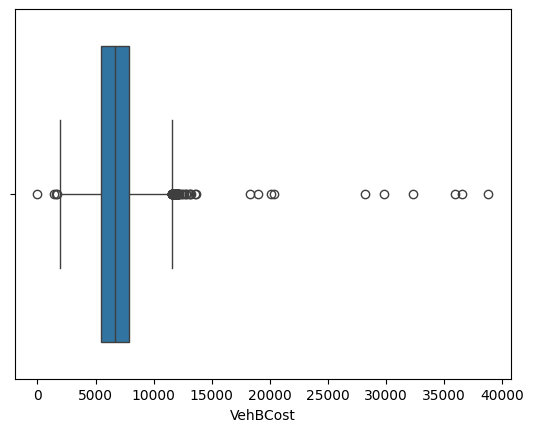

In [ ]:
# How are the values distributed?
# Are there any outliers?
# First check the number of columns
print(eda_df.columns)
# Create new variable containing numerical columns
num_cols=['VehYear','VehicleAge','VehOdo','VehBCost','WarrantyCost','MMRAcquisitionAuctionCleanPrice',
          'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
          'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']
 # Individually (for each column) outliers can be checked using boxplot
display(sns.boxplot(x=eda_df["VehBCost"])) #alternative (sns.boxplot(data= df,x= 'VehBCost'))

<Axes: >

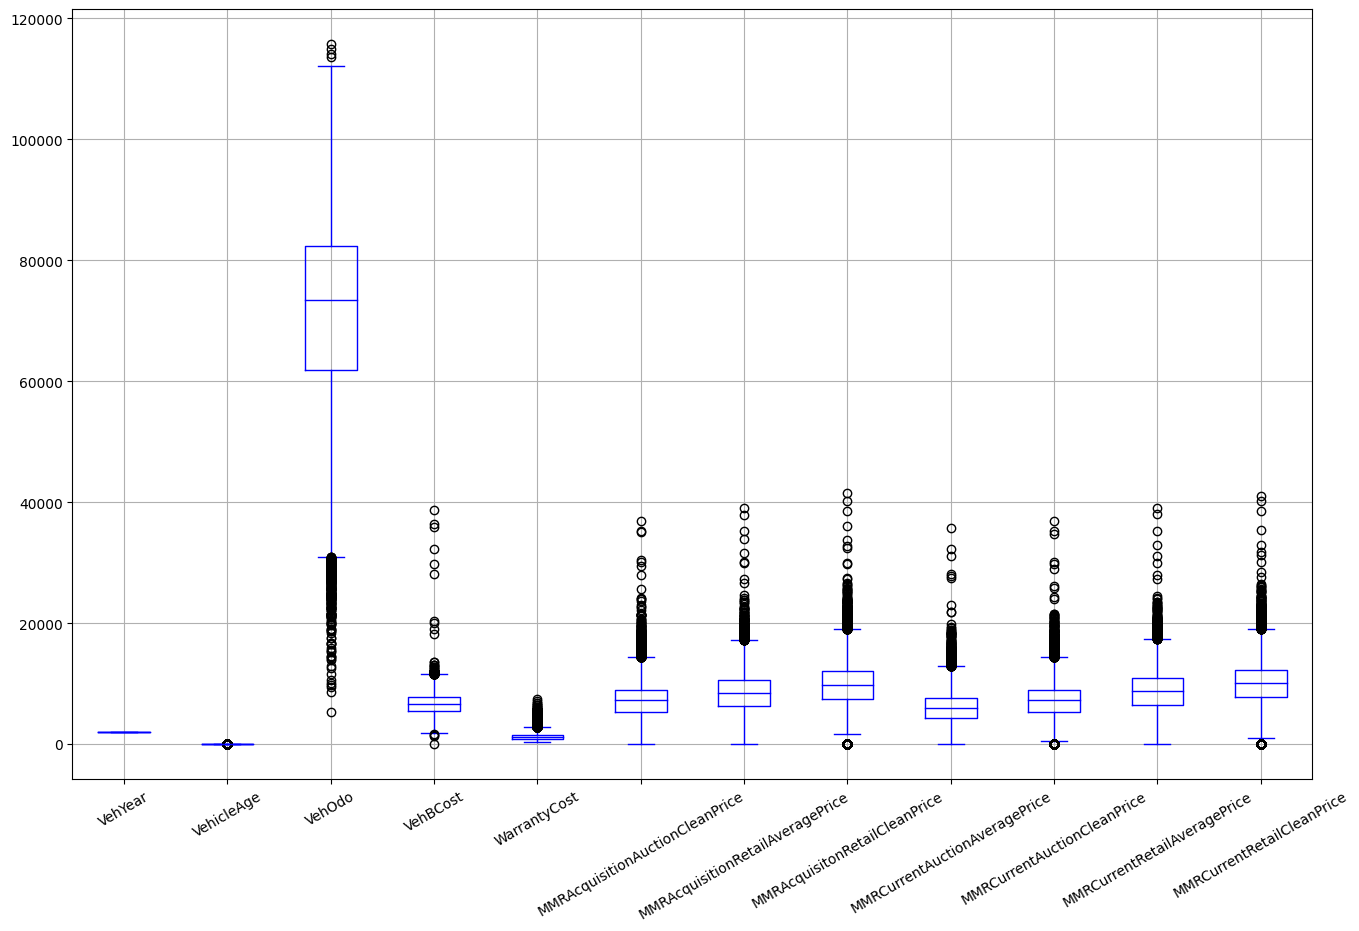

In [ ]:
# Alternatively below code shows you overall scenario for the outliers in all columns
plt.rcParams['figure.figsize']=(16,10)
eda_df.boxplot(column=num_cols,grid='true',color='blue',fontsize=10,rot=30)


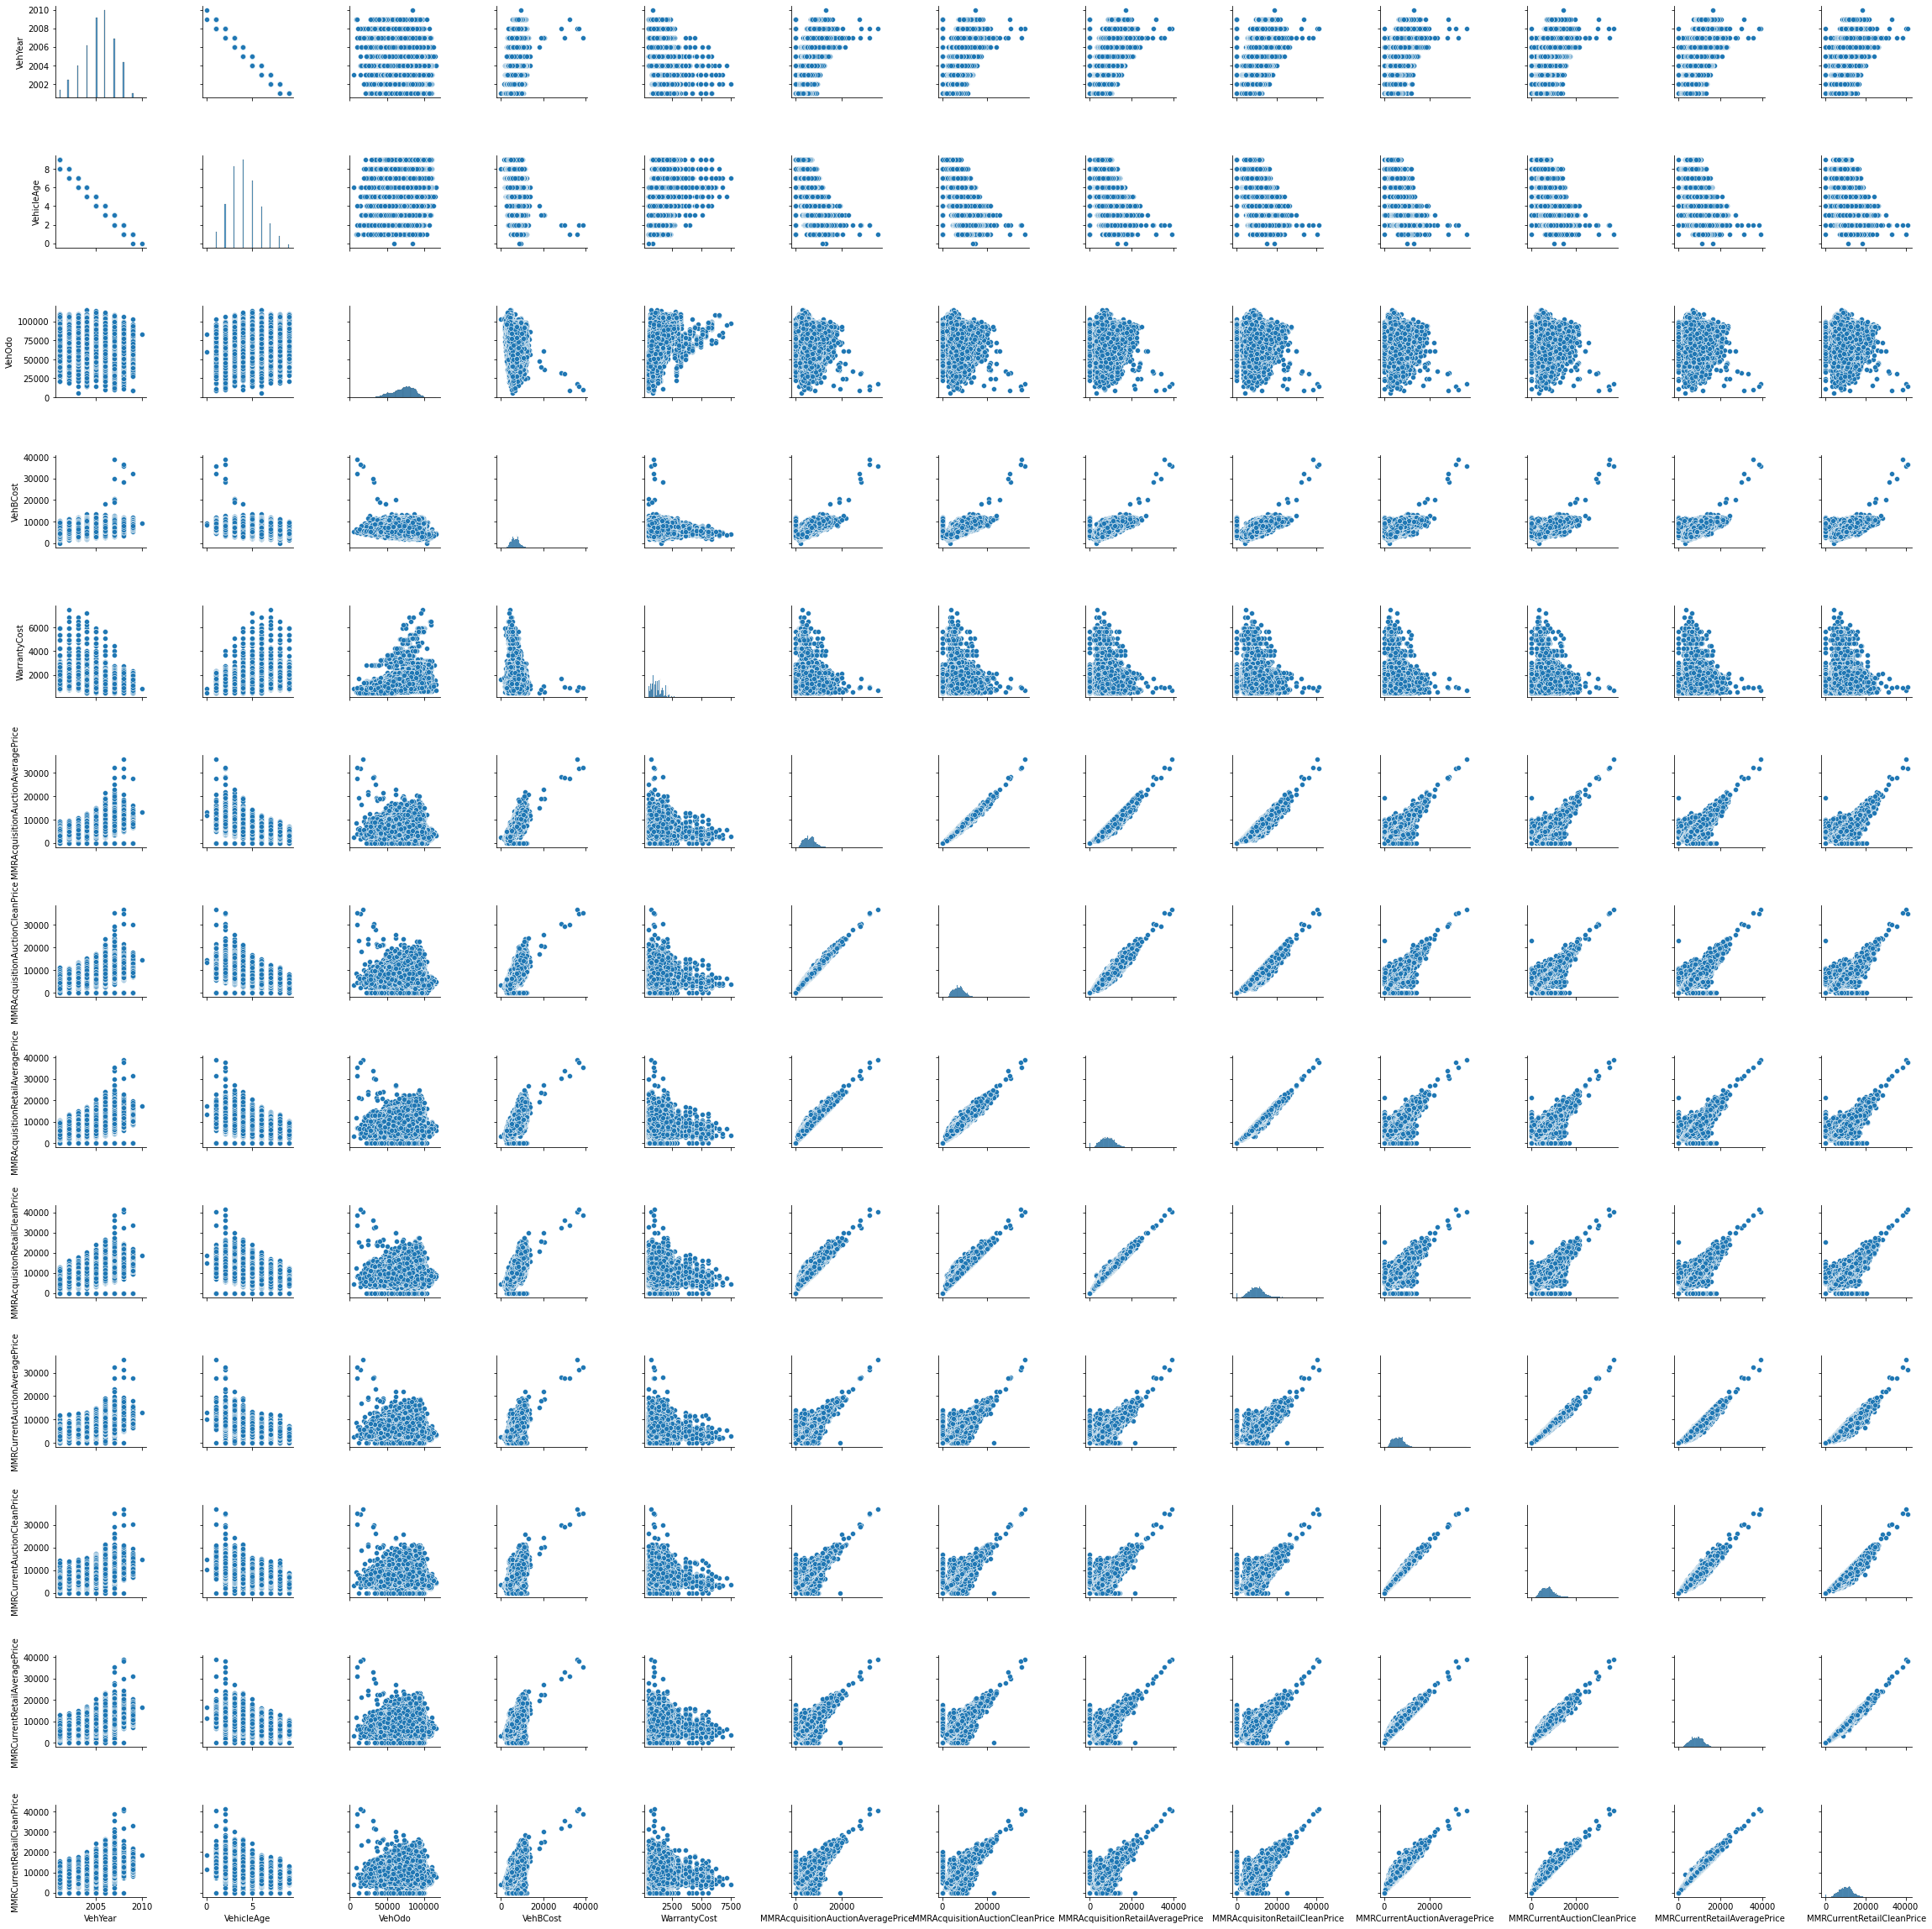

In [ ]:
# Usage of Pairplot shows you alos the overview for all columns
#display(sns.pairplot(eda_df[num_cols]))
## It is observed that from this SNS plot is that after considering two dimension, most of the variables suffer from outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

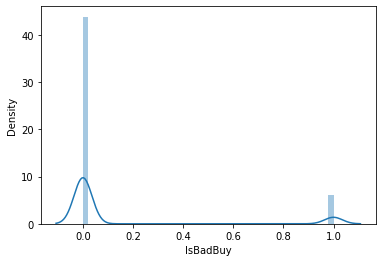

These are different CMAP values
"RdBu"
"Blues"
"Greens"
"Oranges"
"Purples"
"Reds"


It's showing that there are heavy correlation between all the MMR columns


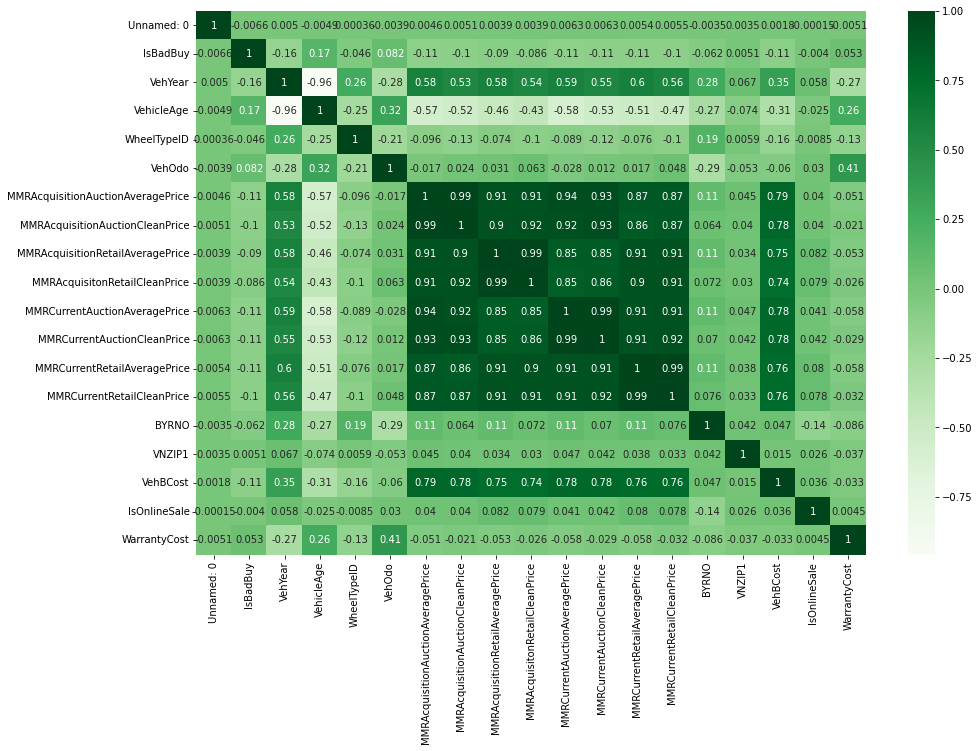

In [ ]:
# To check the features that are correlated
corr=eda_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,annot=True,cmap='Greens' )

print()

print("It's showing that there are heavy correlation between all the MMR columns") # see the center of the heatmap


IsBadBuy
0    57516
1     8104
dtype: int64
col_0        Count
IsBadBuy          
0         0.876501
1         0.123499
<function show at 0x7ae16bda1a20>
The target column in the training samples are highly unbalanced since there are more 0's than 1's


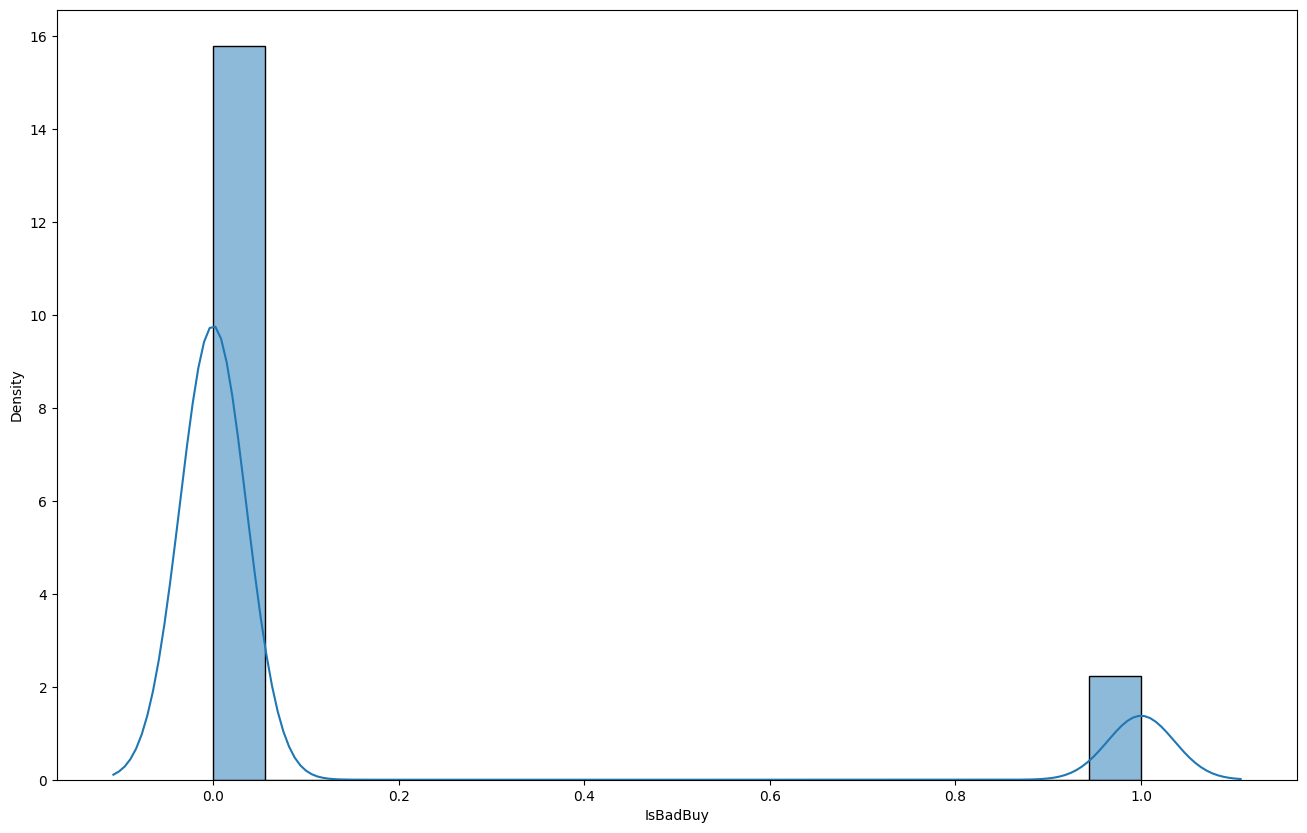

In [ ]:
# To check whether the target vector ('IsBadBuy') is balanced

print(eda_df.groupby("IsBadBuy").size()) # expressed in numbers

# expressed in percentage

print(pd.crosstab(index=eda_df['IsBadBuy'], columns='Count', normalize='columns'))
# showing the plot
sns.histplot(eda_df['IsBadBuy'],kde=True,stat="density",kde_kws=dict(cut=3)) # sns.displot(eda_df['IsBadBuy'])
print(plt.show)    # alternative 'eda_df[['IsBadBuy']].plot(kind='hist',grid = True)'
print("The target column in the training samples are highly unbalanced since there are more 0's than 1's")

# **Training/test split**

Training data:
1. Model training (fitting)
2. Finding the best hyper parameters with a grid search
3. Determining the model quality with cross-validation

Test data:

Evaluating the trained model

Target data:

Predicting target values with the trained model, where you don't know the results

In [ ]:
#Training/Test Split
# perform train-test-split
from sklearn.model_selection import train_test_split

#creating feature matrix and target vector

target = orig_df.loc[:,'IsBadBuy']
features = orig_df.drop('IsBadBuy',axis=1)

#creating training and test data sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 42)

<Axes: ylabel='Frequency'>

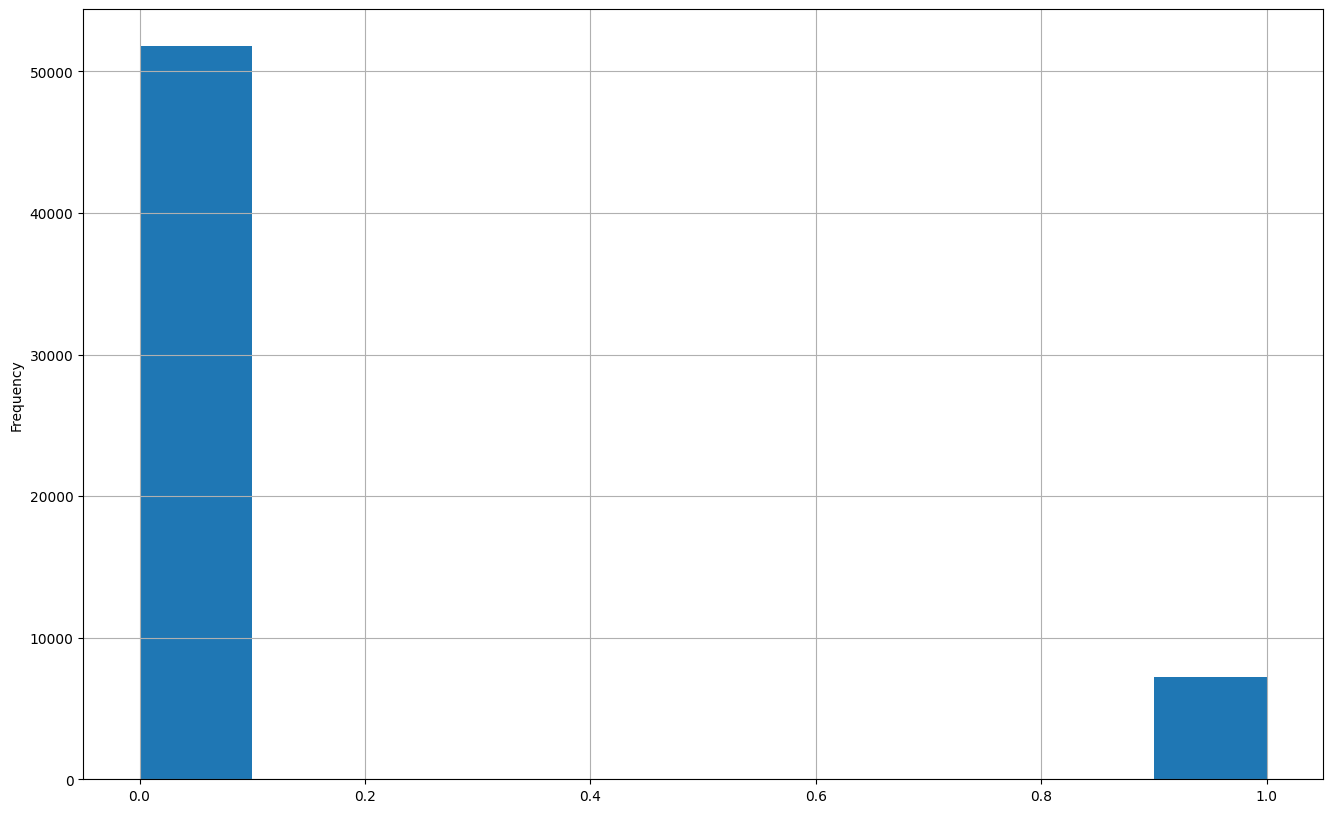

In [ ]:
################## features_train #######################
y_train.plot(kind='hist', grid = True)

<Axes: ylabel='Frequency'>

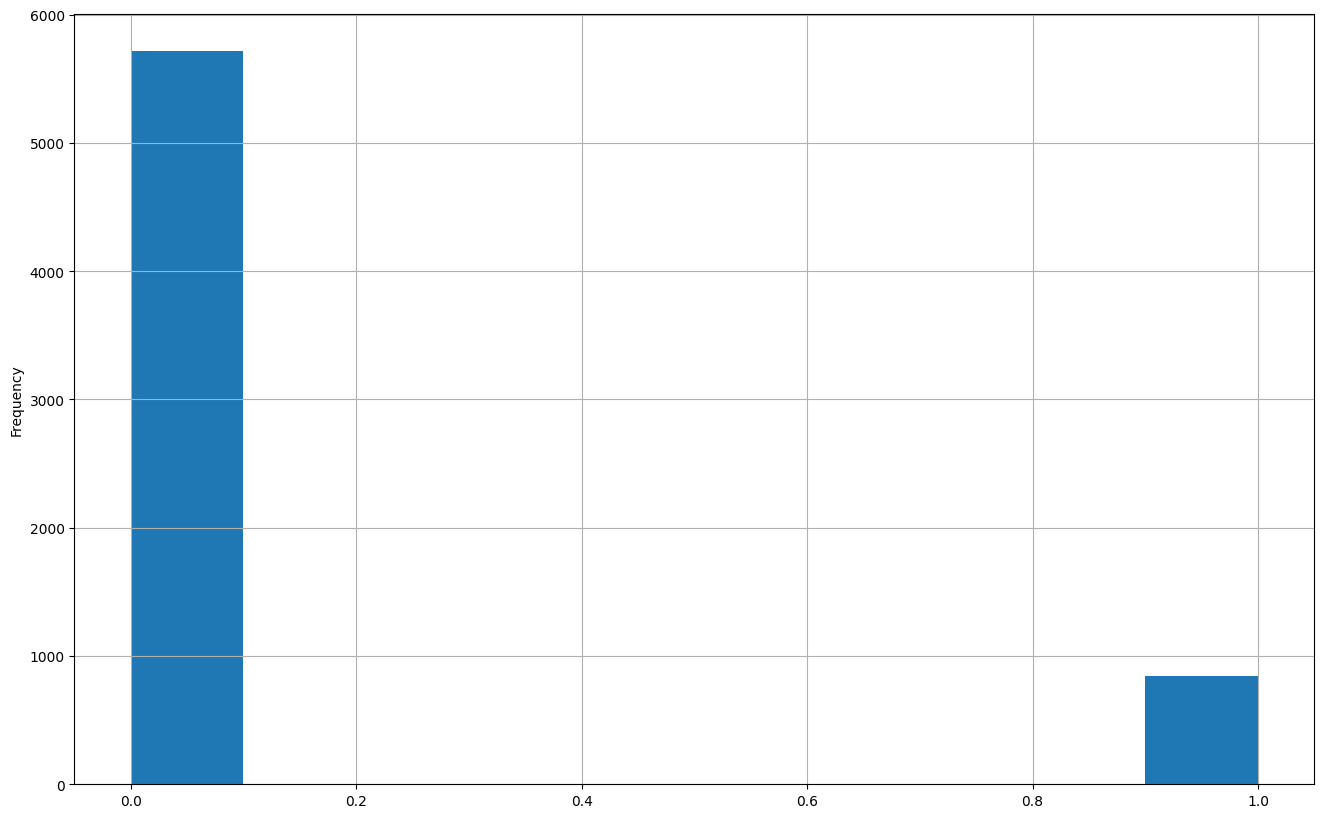

In [ ]:
################## features_test #######################
y_test.plot(kind='hist', grid = True)

In [ ]:
x_test.head()

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
37974,1233705600,ADESA,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L,SILVER,AUTO,...,8390.0,9860.0,NaN,NaN,21053,85226,AZ,7695.0,0,834
13948,1235433600,OTHER,2001,8,FORD,TAURUS 3.0L V6 EFI,SEL,4D SEDAN SE COMFORT,WHITE,AUTO,...,3441.0,4412.0,NaN,NaN,20833,75061,TX,4155.0,0,1220
13821,1278892800,MANHEIM,2006,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,SILVER,AUTO,...,9313.0,10627.0,NaN,NaN,99750,85040,AZ,5500.0,0,975
37769,1265760000,MANHEIM,2003,7,CHRYSLER,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,...,6023.0,7226.0,NaN,NaN,19619,32124,FL,4500.0,0,1689
12959,1234396800,MANHEIM,2002,7,DODGE,1500 RAM PICKUP 2WD,ST,REG CAB 4.7L,SILVER,AUTO,...,4676.0,6200.0,NaN,NaN,18111,30272,GA,6145.0,0,1353


In [ ]:
# save features_test as 'features_test.csv'
x_test.to_csv('features_test.csv')
# Now you have a training data set

# Data Preparation
It includes Data Cleaning and Data Transformation in order to put them into a readable format to model

# **Transforming data types**
* Are the data types correct?

In [ ]:
#orig_df.value_counts()
orig_df.dtypes

IsBadBuy                               int64
PurchDate                              int64
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrent

In [ ]:
# Get a list of all the numeric variables in the dataframe
num_vars = orig_df.select_dtypes(include=['object', 'category']).columns

# Print the list of numeric variables
print(num_vars)

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST'],
      dtype='object')


In [ ]:
# Get the categorical columns
cat_cols = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST']

In [ ]:
# Get the number of categories for each categorical variable
cat_counts = orig_df[cat_cols].apply(pd.Series.nunique, axis=0)
print(cat_counts)
total_cat_count = cat_counts.sum()
print(total_cat_count)

Auction                    3
Make                      29
Model                   1029
Trim                     134
SubModel                 840
Color                     16
Transmission               3
WheelType                  3
Nationality                4
Size                      12
TopThreeAmericanName       4
PRIMEUNIT                  2
AUCGUART                   2
VNST                      34
dtype: int64
2115


In [ ]:
# Again categorizing columns accodingly
useful_cat = ['Auction',  'Transmission',
       'WheelType', 'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART']
large_cat = [ 'Make', 'Size', 'Color','VNST','Model', 'Trim', 'SubModel']

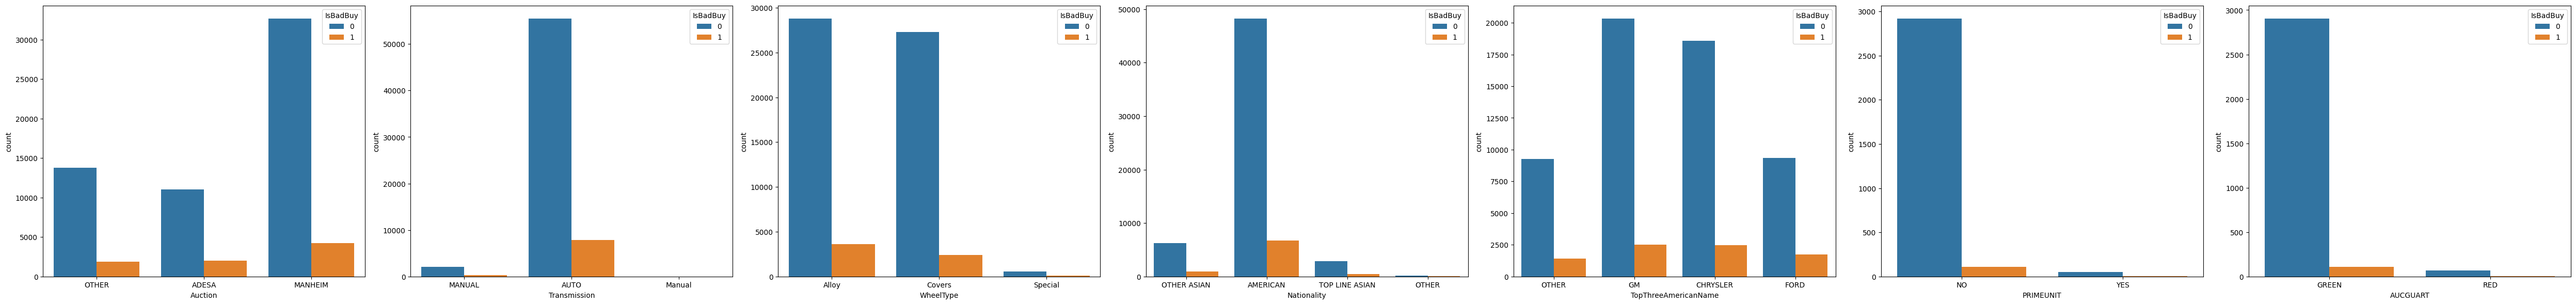

In [ ]:
#more detailed visualization in terms of IsBadBuy with useful categorical columns
f, axs = plt.subplots(1, len(useful_cat), figsize=(50, 6))
for ax, col in zip(axs, useful_cat):
    sns.countplot(data=orig_df, x=col, hue="IsBadBuy", ax=ax)
f.tight_layout()

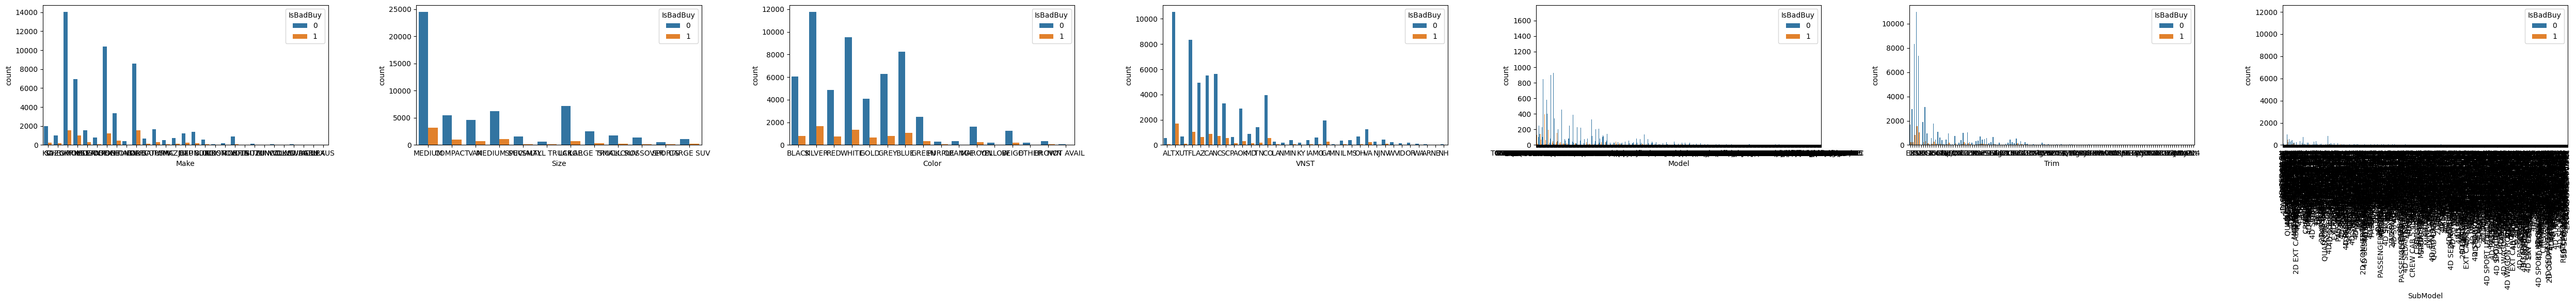

In [ ]:
#more detailed visualization in terms of IsBadBuy with large categorical columns
f, axs = plt.subplots(1, len(large_cat), figsize=(50, 6))
for ax, col in zip(axs, large_cat):
    sns.countplot(data=orig_df, x=col, hue="IsBadBuy", ax=ax)
    # Rotate the x-axis tick labels
    plt.xticks(rotation=90)
f.tight_layout()

In [ ]:
# Create a frequency table for each categorical column
freq_table_1 = orig_df["Auction"].value_counts().reset_index()
freq_table_1.columns = ["Auction", "Frequency"]
print(freq_table_1); print("\n\n")

   Auction  Frequency
0  MANHEIM      36907
1    OTHER      15675
2    ADESA      13038





In [ ]:
# Get a list of all the numeric variables in the dataframe
num_vars = orig_df.select_dtypes(include=['float64']).columns

# Print the list of numeric variables
print(num_vars)

Index(['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost'],
      dtype='object')


In [ ]:
orig_df.dtypes

IsBadBuy                               int64
PurchDate                              int64
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrent

In [ ]:
# Copy training data
x_eda=x_train.copy()
print(x_eda.dtypes)
print(x_eda.info())

PurchDate                              int64
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrent

In [ ]:
orig_df["VNZIP1_new"] = pd.cut(orig_df["VNZIP1"], bins=[0, 30000, 50000, 80000, 90000, 100000], labels=["<30k", "30k-50k", "50k-80k", "80k-90",  ">90k"])

In [ ]:
orig_df["BYRNO_new"] = pd.cut(orig_df["BYRNO"], bins=[0, 10000, 20000, 30000, 100000], labels=["<10k", "20k", "30k",  "100k"])

In [ ]:
orig_df["WarrantyCost_new"] = pd.cut(orig_df["WarrantyCost"], bins=[0,1000, 1500, 2000,  8000], labels=["<1k", "1k-1.5k", "1.5k-2k", "2k-8k"])

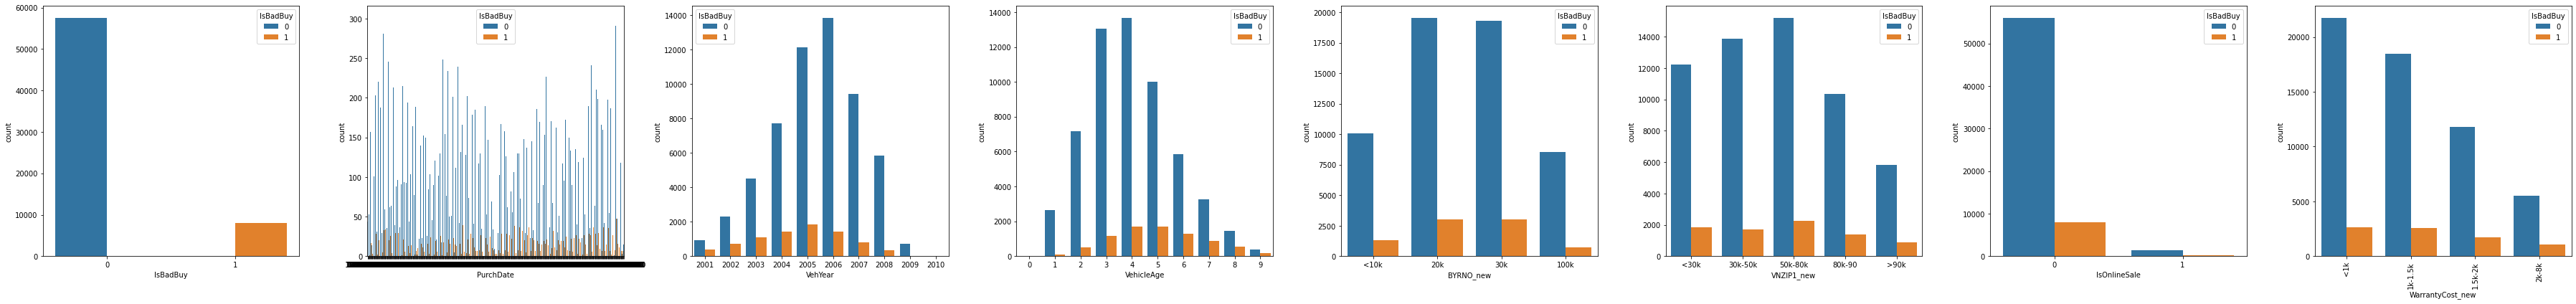

In [ ]:
 int_var = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',  'BYRNO_new', 'VNZIP1_new', 'IsOnlineSale', 'WarrantyCost_new']
##https://www.justintodata.com/how-to-use-python-seaborn-for-exploratory-data-analysis/#




#cols = ["day", "size", "sex", "smoker"]
f, axs = plt.subplots(1, len(int_var), figsize=(50, 6))
for ax, col in zip(axs, int_var):
    sns.countplot(data=orig_df[['IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',  'BYRNO_new', 'VNZIP1_new', 'IsOnlineSale', 'WarrantyCost_new']], x=col, hue="IsBadBuy", ax=ax)
    # Rotate the x-axis tick labels
    plt.xticks(rotation=90)
f.tight_layout()

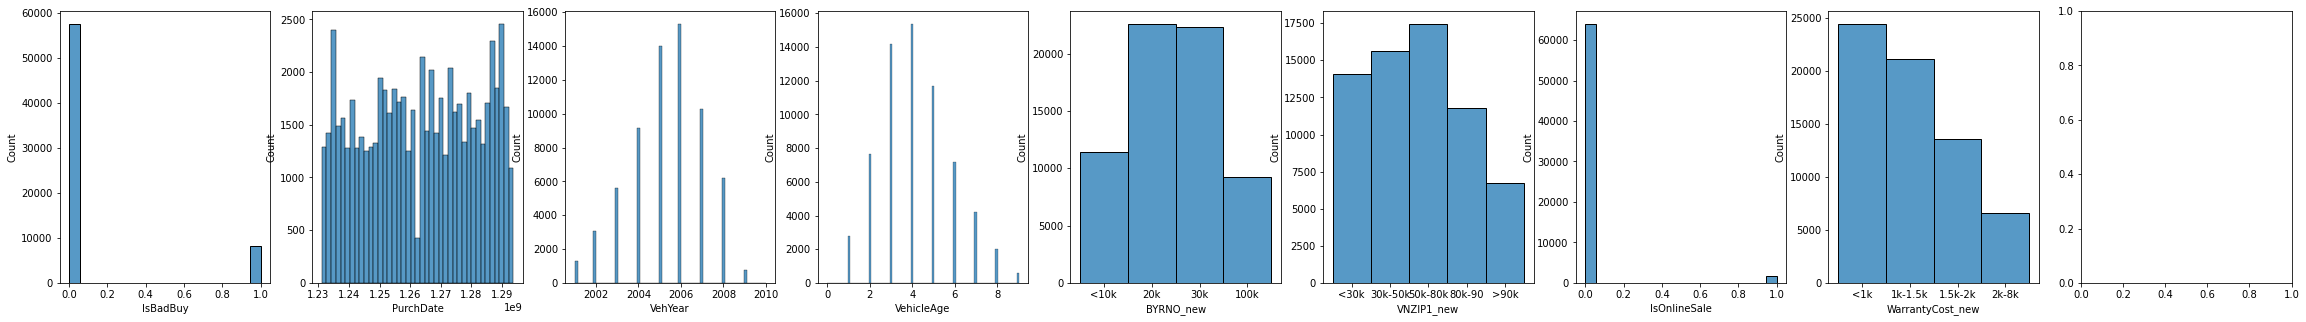

In [ ]:
##https://www.justintodata.com/how-to-use-python-seaborn-for-exploratory-data-analysis/#

# Set up the plot grid
fig, ax = plt.subplots(nrows=1, ncols=9, figsize=(40, 5))

# List of variables to plot
#variables = ['fare', 'age', 'pclass']

# Loop through the variables and plot a histogram for each one
for i, var in enumerate(int_var):
    sns.histplot(x=var, data=orig_df, ax=ax[i])

# Show the plot
plt.show()


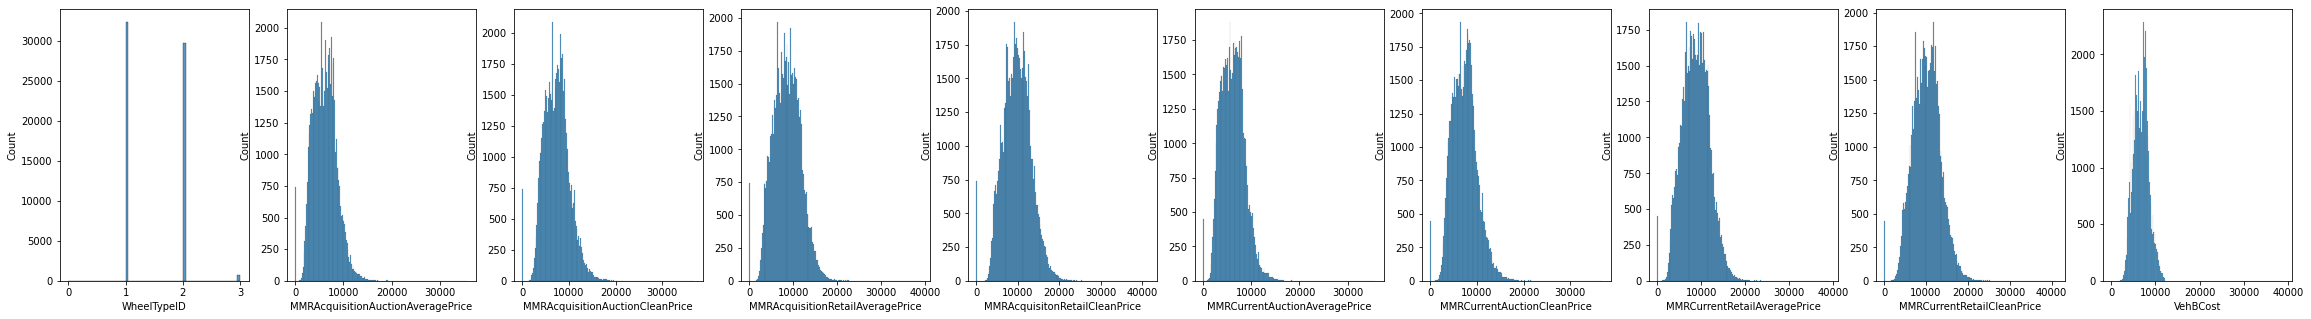

In [ ]:

# Set up the plot grid
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(40, 5))

# List of variables to plot
#variables = ['fare', 'age', 'pclass']

# Loop through the variables and plot a histogram for each one
for i, var in enumerate(float_var):
    sns.histplot(x=var, data=orig_df, ax=ax[i])

# Show the plot
plt.show()

# **Transforming data types**
Are the data types correct?

In [ ]:
############################## copy training data ##############################
x_eda = x_train.copy()
#x_eda = clean_data(x_eda)
print(x_eda.dtypes)
print(x_eda.info())

In [ ]:
def clean_data(df):


  '''
  Input: Dataframe
  Process: 1. checks and modifies the columns(if necessary) with appropriate datatypes.
  2. Drop redundant columns
  Output: Cleaned dataframe

  '''
  cat_col = ['Auction',  'Transmission', 'WheelType', 'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'Make', 'Size', 'Color','VNST','Model', 'Trim', 'SubModel']
  useful_cat = ['Auction',  'Transmission',
       'WheelType', 'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART']
  #large_cat = ['Make', 'Size', 'Color','VNST','Model', 'Trim', 'SubModel']
  num_col = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge', 'VehOdo', 'BYRNO', 'VNZIP1', 'IsOnlineSale', 'WarrantyCost', 'WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']

  int_var = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',
       'VehOdo', 'BYRNO', 'VNZIP1', 'IsOnlineSale', 'WarrantyCost']
  float_var = ['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']


  date_col = ['PurchDate']

    # 1. Change PurchDate to datetime.
  df['PurchDate'] = pd.to_datetime(df['PurchDate'], unit='s')
   # 2. Change objects to category datatype

  df['Transmission'] = df['Transmission'].str.replace('Manual', 'MANUAL')
  for col in useful_cat:
    df[col] = df[col].astype('category')

# 3. removing redundant columns - 'VehYear'-'VehicleAge', 'WheelType'-'WheelTypeID' are redundant
  #df = df.drop(large_cat, axis=1)
  df = df.drop('VehYear', axis=1)
  df = df.drop('WheelType', axis=1)
  return(df)

In [ ]:
#x_eda=dim_reduction(x_eda)
#x_eda.head()

In [ ]:
#mask = eda_df.isnull()

# Select only the rows with missing values
#df_missing = eda_df.loc[mask.any(axis=1)]
#mask.head()

In [ ]:
float_var = ['WheelTypeID', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']

In [ ]:
#imputer = SimpleImputer(strategy='median', missing_values=np.nan)
#imputer = imputer.fit(eda_df[float_var])
#eda_df[float_var] = imputer.transform(eda_df[float_var])
#eda_df[float_var].isnull().sum()

In [ ]:
def int_data_type_conversion(df):

 '''
 Downconversion of int64 to uint16 and uint8
 '''
 int8_cols = ['VehicleAge', 'IsOnlineSale']
 for col in int8_cols:

  df[col] = df[col].astype('uint8')
 int16_cols = ['VehBCost', 'WarrantyCost']
 for col in int16_cols:
    df[col] = df[col].astype('uint16')
 return(df)

In [ ]:
eda_df[num_col].isnull().sum()

In [ ]:
eda_df[cat_col].isnull().sum()

In [ ]:
#################################### Data imputatuion #########################################
def data_imputation(df):

  '''
  Input: Dataframe
  Process: 1. Fills the NaNs in numerical columns with medians of the corresponding column.
  2. Fills the NaNs in categorical columns with appropriate unique entry names.
  3. Downcasts int64
  Output: Data imputed dataframe
  '''
  cat_col = ['Transmission',  'Nationality',  'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'Size', 'Color', 'Trim', 'SubModel']

#########################   convert into category  #############################
  for i in cat_col:
    df[cat_col] = df[cat_col].astype('category')

  ######################### for numerical variable #############################
  num_col = [ 'WheelTypeID', 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'VehBCost']

  df['WheelTypeID'] = df['WheelTypeID'].fillna(0)

  imputer = SimpleImputer(strategy='median', missing_values=np.nan)
  imputer = imputer.fit(df[num_col])
  df[num_col] = imputer.transform(df[num_col])
  df[num_col].isnull().sum()
 ############################ for categorical variable ########################
  cat_dict ={'Trim' : 'OTHER',
             'SubModel' : 'OTHER',
              'Color' : 'OTHER',
              'Transmission' : 'MANUAL',
              'Nationality': 'OTHER',
              'Size' : 'MEDIUM',
              'TopThreeAmericanName' : 'OTHER',
              'PRIMEUNIT' : 'OTHER',
              'AUCGUART' : 'YELLOW'
              }
  for key in cat_dict:
    if cat_dict[key] not in df[key].values:
      df[key] = df[key].cat.add_categories(cat_dict[key])
    df[key] = df[key].fillna(cat_dict[key])
  # 3. int64 conversion
  df = int_data_type_conversion(df)
  return(df)

In [ ]:
data_imputation(eda_df)

# **Outlier Detection**
RANSAC (RANdom SAmple Consensus) is an algorithm that can be used to identify and reject outlying data points in a dataset. It works by fitting a model to a subset of the data (called inliers) and then using this model to make predictions for the rest of the data. If the predicted values are significantly different from the actual values, the data point is considered an outlier.

RANSAC is particularly useful for datasets that contain a significant amount of noise or outliers, as it can robustly fit a model to the inliers even in the presence of such noise.

The RANSACRegressor class in scikit-learn is an implementation of the RANSAC algorithm for regression tasks. It can be used to fit a linear or nonlinear model to a dataset and identify and exclude outlying data points.

To use RANSACRegressor, you will need to specify the type of model you want to fit (e.g. linear, polynomial) and the maximum number of iterations to run the algorithm. The regressor will then fit the model to the inliers and return the model parameters and a mask identifying the inliers and outliers in the dataset. You can then use the model to make predictions on the inliers or use the mask to remove the outliers from the dataset.

Here is an example of how to use RANSACRegressor to fit a linear model to a dataset and identify the outliers:








In [ ]:
def remove_outliers(df, X_col, y_col):
  model = RANSACRegressor(residual_threshold=mad(df[y_col])*3, random_state=0, max_trials=1000)
  X= df[[X_col]]
  y= df[y_col]

  model.fit(X, y)
  print('No of inliers:', model.inlier_mask_.sum())
  print('No of outliers:', (~model.inlier_mask_).sum())
  print('Inliers percentage:', model.inlier_mask_.sum()/df.shape[0])

  ax = sns.scatterplot(y=df.loc[model.inlier_mask_, y_col], x=df.loc[model.inlier_mask_, X_col])

  sns.scatterplot(y=df.loc[~model.inlier_mask_, y_col], x=df.loc[~model.inlier_mask_, X_col],
  color='orange', ax=ax)
  inlier_mask = model.inlier_mask_
  return(df[inlier_mask])


In [ ]:
x_eda = remove_outliers(eda_df, 'VehOdo', 'VehBCost')

ValueError: ignored

In [ ]:
print("Before outlier treatment:", eda_df.shape)
print("After removing outliers:", x_eda.shape)

Before outlier treatment: (65620, 34)
After removing outliers: (65458, 34)


In [ ]:
x_eda = x_train.copy()
x_eda = clean_data(x_eda)
x_eda = data_imputation(x_eda)
x_eda = remove_outliers(x_eda, 'VehOdo', 'VehBCost')
x_eda = dim_reduction(x_eda)
df=x_eda
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
#print('Null Report',df2.isnull().sum())
#df1.shape
#print('df_concat:',df_concat.shape)
#print('x:',x.shape)
#print('df2:',df2.shape)
#print('df3:',df3.shape)
#print(x.info)
#df_concat.head()

In [ ]:
def dim_reduction(df):
  redundant = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
            'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
            'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
            'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

# Generate a random data set with 100 samples and 5 features

  from sklearn.decomposition import PCA


  # Create a PCA object with n_components dimensions
  pca = PCA(n_components=8)

  # Fit the PCA model to the data and transform it
  X_transformed = pca.fit_transform(df.loc[:,redundant])
  comp1=X_transformed[:,0]
  df=df.drop(redundant,axis=1)
  #comp1=X_transformed.iloc[:,0]
  df['pca_price'] = comp1

  # The transformed data is now stored in X_transformed
  # Access the principal components
  principal_components = pca.components_
  print("All Principal components", principal_components)

  print("\n\n")
  # Access the explained variance ratio
  explained_variance = pca.explained_variance_ratio_
  print("Explained variation ration:", explained_variance*100)
  #df2 = pd.DataFrame(X_transformed, columns=['new_price', 'b', 'c','d','e','f','g','h'])
  #new_price=df2.drop([ 'b', 'c','d','e','f','g','h'],axis=1)
  ############################################################
  #df = pd.merge(df, new_price, left_index=True, right_index=True, how='left')# concating has many options in pandas

  return(df)

In [ ]:
x_eda.isnull().sum()

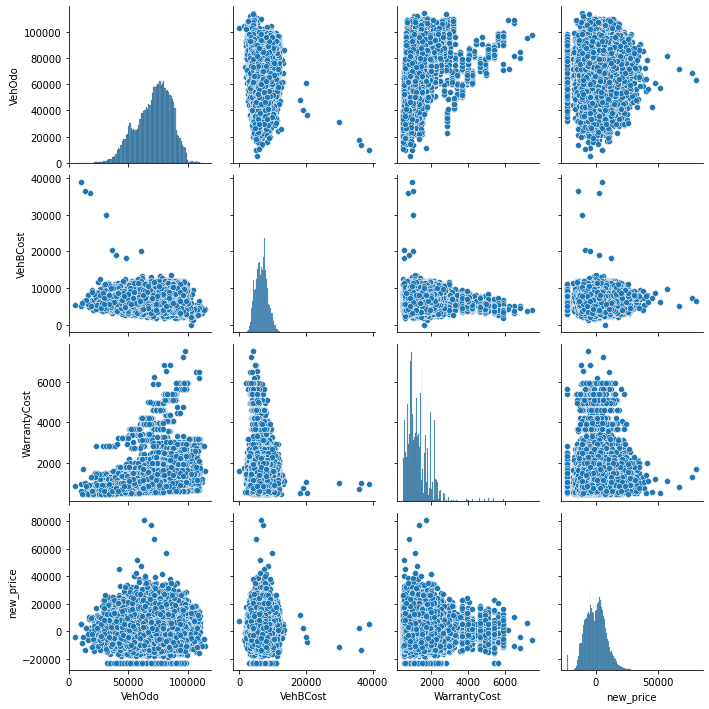

In [ ]:
x_eda = dim_reduction(x_eda)

check_corr_cols = ['VehOdo', 'VehBCost', 'WarrantyCost', 'pca_price']
sns.pairplot(x_eda[check_corr_cols]);


# **Modeling**

In [ ]:

# define num_cols and cat_cols
cols = ['Auction', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelTypeID',
      'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
      'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale',
      'WarrantyCost', 'pca_price']
cat_cols = ['Auction', 'Make', 'Color', 'Transmission',
            'Nationality', 'Size', 'TopThreeAmericanName',
            'PRIMEUNIT', 'AUCGUART', 'VNST']
num_cols = ['VehicleAge', 'WheelTypeID', 'VehOdo',
            'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
            'pca_price']


In [ ]:
drop_features = ['Model', 'SubModel', 'Trim']
for col in drop_features:
 print(col, ': ', x_eda[col].nunique())

Model :  998
SubModel :  814
Trim :  134


In [ ]:
one_hot_encoding_features = ['Auction', 'Make', 'Color', 'Transmission',
 'Nationality', 'Size', 'TopThreeAmericanName',
 'PRIMEUNIT', 'AUCGUART', 'VNST']
for col in one_hot_encoding_features:
 print(col, ': ', x_eda[col].nunique())

Auction :  3
Make :  29
Color :  16
Transmission :  2
Nationality :  4
Size :  12
TopThreeAmericanName :  4
PRIMEUNIT :  3
AUCGUART :  3
VNST :  34


In [ ]:
################################################################################
def category_transformation(df, col, category, threshold):
    '''
    Inputs: df :dateframe
    col : Column nume (string)
    category : unique entry (string)
    threshold : percentage of entries that are below the threshold will be grouped
    under category (unique entry). It takes values from 0 to 1(100%).
    Process: Checks the number of entries under each unique value. If the number of entries
    are below threshold, they are grouped under a new entry (Category).
    Output : Returns a Series with reduced number of unique entries.

    '''

    cat_col = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
        'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST']

    #int_var = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',  'BYRNO_new', 'VNZIP1_new', 'IsOnlineSale', 'WarrantyCost_new']

    #df["VNZIP1_new"] = pd.cut(df["VNZIP1"], bins=[0, 30000, 50000, 80000, 90000, 100000], labels=["<30k", "30k-50k", "50k-80k", "80k-90",  ">90k"])
    #df["BYRNO_new"] = pd.cut(df["BYRNO"], bins=[0, 10000, 20000, 30000, 60000, 100000], labels=["<10k", "20k", "30k", "4k",  "10k"])
    #df["WarrantyCost_new"] = pd.cut(df["WarrantyCost"], bins=[0, 500, 1000, 1500, 2000,  8000], labels=["<0.5k", "0.5k-1k", "1k-1.5k", "1.5k-2k", "2k-8k"])
    #df = df.drop(columns = ["VNZIP1","BYRNO", "WarrantyCost"], inplace=True)

#########################   convert into category  #############################
    for i in cat_col:
      df[cat_col] = df[cat_col].astype('category')
################################################################################
    #print('Before:', df[col].nunique())
    series = pd.value_counts(df[col], normalize=True)
    mask = series.lt(threshold)
    mask_col = df[col].isin(series[mask].index)

    if category not in(series.index):
      df[col] = df[col].cat.add_categories(category)

    df.loc[mask_col, col] = category
    #print('After: ', df[col].nunique())
    return(df[col])

In [ ]:
x_eda.dtypes

In [ ]:
x_eda['VNST'].nunique()

23

In [ ]:
  cat_col = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
        'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST']

#########################   convert into category  #############################
  for i in cat_col:
    x_eda[cat_col] = x_eda[cat_col].astype('category')

In [ ]:
x_eda['VNST'] = category_transformation(x_eda, 'VNST', 'OTHER', 0.005)

In [ ]:
  drop_f = ['PurchDate', 'Model', 'Trim', 'SubModel']



  #df['VNST'] = category_transformation(df, 'VNST', 'OTHER', 0.005)
  x_eda = x_eda.drop(drop_f, axis=1)

In [ ]:
################################################################################
def engineer_features(df):
  '''
  1. Dropped columns of less interest
  2. Noted columns on which OneHot Encoding will be performed.
  The number of unique entries in VNST has been reduced using category transformation.
  '''
  cat_col = ['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
        'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT',
       'AUCGUART', 'VNST']

#########################   convert into category  #############################
  for i in cat_col:
    df[cat_col] = df[cat_col].astype('category')
################################################################################
  drop_f = ['PurchDate', 'Model', 'Trim', 'SubModel']


  df['VNST'] = category_transformation(df, 'VNST', 'OTHER', 0.005)
  df = df.drop(drop_f, axis=1)
  orig_df["VNZIP1_new"] = pd.cut(orig_df["VNZIP1"], bins=[0, 30000, 50000, 80000, 90000, 100000], labels=["<30k", "30k-50k", "50k-80k", "80k-90",  ">90k"])
  orig_df["WarrantyCost_new"] = pd.cut(orig_df["WarrantyCost"], bins=[0, 1000, 1500, 2000,  8000], labels=["0-1k", "1k-1.5k", "1.5k-2k", "2k-8k"])
  orig_df["BYRNO_new"] = pd.cut(orig_df["BYRNO"], bins=[0, 10000, 20000, 30000,  100000], labels=["<10k", "20k", "30k",  "10k"])
  drop_f2 = ["VNZIP1","BYRNO", "WarrantyCost"]
  df = df.drop(drop_f2, axis=1)
  return(df)

In [ ]:
engineer_features(x_eda)

In [ ]:
cols = ['Auction', 'VehicleAge', 'Make', 'Color',
 #'Transmission',
  'WheelTypeID',
  'VehOdo', 'Nationality', 'Size',
  'TopThreeAmericanName',
  #'PRIMEUNIT',
  'AUCGUART',
  #'BYRNO', 'VNZIP1',
  'VNST', 'VehBCost',
  'IsOnlineSale',
  'WarrantyCost', 'pca_price']
cat_cols=['Auction',
  'Make',
  'Color',
  #'Transmission',
  'Nationality',
  'Size',
  'TopThreeAmericanName',
  #'PRIMEUNIT',
  'AUCGUART',
   'VNST',
   'WarrantyCost_new',
  'VNZIP1_new',
  'BYRNO_new']
num_cols = ['VehOdo',
  'VehBCost',
  'pca_price']
nom_cols = ['VehicleAge', 'WheelTypeID', 'IsOnlineSale',
  #'BYRNO', 'VNZIP1',
 ]

 #int_var = [ 'IsBadBuy', 'PurchDate', 'VehYear', 'VehicleAge',  'BYRNO_new', 'VNZIP1_new', 'IsOnlineSale', 'WarrantyCost_new']


In [ ]:
print(len(cols))
print(len(cat_cols) + len(num_cols) + len(nom_cols))

15
17


# **Model training**

Now it's time to create and evaluate a model. When creating the model, it can be helpful to ask yourself the following questions:
Which model should you use? You got to know the following Classification models in this course:

sklearn.neighbors.KNeighborsClassifier (see Modul 1, Chapter 2, k Nearest Neighbors)

sklearn.linear_model.LogisticRegression (see Module 2, Chapter 2, Logistic Regression)

sklearn.tree.DecisionTreeClassifier (see Module 2, Chapter 3, Decision Tree)

sklearn.ensemble.RandomForestClassifier (see Module 2, Chapter 3, From Decision Trees to Random Forests with
Ensembling)

sklearn.svm.SVC (see Module 2, Chapter 4, Support Vector Machines)

Artificial neural networks with keras (see Module 2, Chapter 5, Introduction to Artificial Neural Networks - Neural Networks)

How good are the predictions on unseen data? The following objects can help you with this:

sklearn.pipeline.pipeline (see Module 1, Chapter 1, Introduction to Pipelines)

sklearn.model_selection.KFold (see Module 1, Chapter 1, Validating Models with Cross Validation)

sklearn.model_selection.cross_val_score() (see Module 1, Chapter 1, Introduction to Pipelines)

sklearn.model_selection.validation_curve() (see Module 1, Chapter 1, Grid Search)

sklearn.model_selection.GridSearchCV (see Module 1, Chapter 1, Grid Search)
 Which features are important for your model
and which ones can you do without?

We recommend that you run the following code cell so that you do not see the data conversion warning.


In [ ]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

To save you some typing, we've already defined an import command. Feel free to add to it:

In [ ]:
#useful imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

Building a model is an iterative process. We typically go through the following steps when choosing a model:

Select features

Standardization and dimensionality reduction (optional)

Hyperparameter selection and training

Validate the model

It's best to use a Pipeline so that you can easily evaluate your individual steps. If you're balancing the target categories by over or
undersampling, it is best to use imblearn.pipeline and to integrate the sklearn.pipeline you have used so far there to prevent the
target categories from being balanced in the validation set. Otherwise, the validation score is not representative of the actual model quality.
Remember that balancing the target categories using the class_weight='balanced' often achieves good results.

First build a simple model and evaluate it to have a comparison value.

No of inliers: 58716
No of outliers: 342
Inliers percentage: 0.9942090825967693
All Principal components [[ 2.96190013e-01  3.26878506e-01  3.83426656e-01  4.11609151e-01
   2.89609183e-01  3.20653608e-01  3.74698791e-01  4.02358578e-01]
 [-2.29605142e-02 -1.62216984e-03  5.06112142e-01  5.48508995e-01
  -4.10602394e-01 -4.45422813e-01 -1.74653505e-01 -2.12035165e-01]
 [ 4.39952041e-01  5.04392732e-01 -5.41310956e-02 -6.94194617e-05
   1.67837777e-01  1.87300933e-01 -4.89874396e-01 -4.95854727e-01]
 [ 3.15159963e-01  4.97594143e-01 -3.29715045e-01 -1.67351620e-01
  -4.51982640e-01 -4.11744154e-01  1.88385898e-01  3.27177155e-01]
 [-4.13444885e-01  1.88844358e-01 -3.44311442e-01  4.10927418e-01
  -2.54180382e-01  3.75054402e-01 -4.28698159e-01  3.41955904e-01]
 [ 2.51328442e-01 -1.81103555e-01  4.63906187e-01 -4.36281496e-01
  -2.40991296e-01  1.75912915e-01 -4.68470968e-01  4.35887389e-01]
 [ 3.72525350e-01 -3.61309189e-01 -3.06242904e-01  3.07983711e-01
   4.23538104e-01 -3.97610179e-

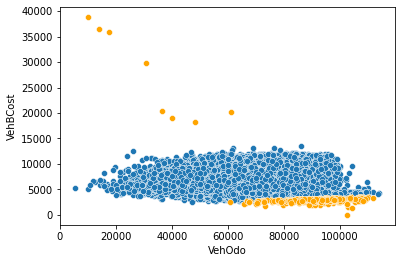

In [ ]:
############### Data Preparation #####################
# 1. features_train preparation
features_train = x_train.copy()
features_train = clean_data(features_train)
features_train = data_imputation(features_train)
features_train = remove_outliers(features_train, 'VehOdo', 'VehBCost')
features_train = dim_reduction(features_train)
features_train = engineer_features(features_train)
target_train = y_train[features_train.index]
print('Completed data preparation for features_train....')

In [ ]:
features_train.head()

,Auction,VehicleAge,Make,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,pca_price
21430,OTHER,5,CHEVROLET,GREEN,AUTO,2.0,71041,AMERICAN,VAN,GM,OTHER,YELLOW,MS,4700,0,-9405.353498
53433,OTHER,2,KIA,SILVER,AUTO,2.0,63941,OTHER ASIAN,COMPACT,OTHER,OTHER,YELLOW,CO,5255,0,-8841.423547
13278,OTHER,3,PONTIAC,WHITE,AUTO,1.0,74180,AMERICAN,MEDIUM,GM,OTHER,YELLOW,CA,7305,0,151.817408
29356,MANHEIM,4,GMC,GREY,AUTO,1.0,61522,AMERICAN,MEDIUM SUV,GM,OTHER,YELLOW,FL,9300,0,4863.060328
28157,MANHEIM,3,FORD,RED,AUTO,1.0,94153,AMERICAN,LARGE,FORD,OTHER,YELLOW,NV,6955,1,6339.296884


In [ ]:
features_train.isna().sum()

Auction                 0
VehicleAge              0
Make                    0
Color                   0
Transmission            0
WheelTypeID             0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
VNST                    0
VehBCost                0
IsOnlineSale            0
pca_price               0
VNZIP1_new              0
BYRNO_new               0
WarrantyCost_new        0
dtype: int64

In [ ]:
# 2. features_test preparation
features_test = x_test.copy()
features_test = clean_data(features_test)
features_test = data_imputation(features_test)
features_test = dim_reduction(features_test)
features_test = engineer_features(features_test)
target_test = y_test.copy()
print('Completed data preparation for features_test....')

All Principal components [[ 0.29787715  0.32851335  0.37978467  0.40816012  0.29369226  0.32335208
   0.37547867  0.40090043]
 [ 0.21842383  0.22442961 -0.48338155 -0.49856199  0.43731098  0.47362683
  -0.05712773 -0.02955944]
 [-0.37350824 -0.43873784 -0.18051237 -0.24908526  0.01579782  0.01622871
   0.52081737  0.54918926]
 [-0.32574096 -0.50770021  0.32243724  0.15298164  0.45203885  0.42254926
  -0.18229607 -0.30437693]
 [-0.40918074  0.19350698 -0.34600367  0.40382451 -0.25259244  0.37203827
  -0.43187743  0.35156773]
 [ 0.29468422 -0.20701831  0.4368071  -0.4122941  -0.21900144  0.146038
  -0.48462058  0.45317981]
 [ 0.31575309 -0.31625764 -0.31748857  0.32031506  0.47459737 -0.43942839
  -0.3054195   0.29199198]
 [-0.5137869   0.45949919  0.27246543 -0.25245203  0.42533285 -0.37346076
  -0.19134604  0.17297342]]



Explained variation ration: [9.25153031e+01 3.59230952e+00 2.92271190e+00 4.93374671e-01
 3.51197143e-01 8.49310827e-02 2.72117966e-02 1.29608025e-02]
Completed data

In [ ]:
features_test.isna().sum()

Auction                 0
VehicleAge              0
Make                    0
Color                   0
Transmission            0
WheelTypeID             0
VehOdo                  0
Nationality             0
Size                    0
TopThreeAmericanName    0
PRIMEUNIT               0
AUCGUART                0
VNST                    0
VehBCost                0
IsOnlineSale            0
pca_price               0
dtype: int64

# **Export dataframe as csv file from google colab to google drive**

In [ ]:
################################################################################
import os

# Create a new directory in your Google Drive
data_dir = '/content/drive/My Drive/Files/'
if not os.path.exists(data_dir):
  os.makedirs(data_dir)

features_train.to_pickle(os.path.join(data_dir, 'features_train.pkl'))
features_test.to_pickle(os.path.join(data_dir, 'features_test.pkl'))

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
target_train.to_pickle(os.path.join(data_dir, 'target_train.pkl'))
target_test.to_pickle(os.path.join(data_dir, 'target_test.pkl'))
################################################################################

# **Import Train and Test data from Google Drive**

In [ ]:
################################################################################
features_train = pd.read_pickle('features_train.pkl')
target_train = pd.read_pickle('target_train.pkl')
features_test = pd.read_pickle('features_test.pkl')
target_test = pd.read_pickle('target_test.pkl')
features_aim = pd.read_csv('features_aim.csv', delimiter=";")
################################################################################

In [ ]:
features_test.dtypes

Auction                 category
VehicleAge                 uint8
Make                    category
Color                   category
Transmission            category
WheelTypeID              float64
VehOdo                     int64
Nationality             category
Size                    category
TopThreeAmericanName    category
PRIMEUNIT               category
AUCGUART                category
VNST                    category
VehBCost                  uint16
IsOnlineSale               uint8
pca_price                float64
dtype: object

In [ ]:
#print(features_train.isnull().sum())
#print(features_test.isnull().sum())
#features_train.columns
# Get a list of all the numeric variables in the dataframe
num_vars = features_train.select_dtypes(include=['float64', 'category']).columns
#print(num_vars)
features_train.dtypes

Auction                 category
VehicleAge                 uint8
Make                    category
Color                   category
Transmission            category
WheelTypeID              float64
VehOdo                     int64
Nationality             category
Size                    category
TopThreeAmericanName    category
PRIMEUNIT               category
AUCGUART                category
VNST                    category
VehBCost                  uint16
IsOnlineSale               uint8
pca_price                float64
dtype: object

In [ ]:
#initializing models and metrics list
models = []
recall = []
precision = []
f1 = []
accuracy = []

In [ ]:
################ build unoptimized model ####################
## Logistic Regressio

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
onehot = OneHotEncoder()
col_tx = ColumnTransformer([('cat', onehot, cat_cols),
                            ('num', scaler, num_cols),
                            ('nom', 'passthrough', nom_cols)])
model_log = LogisticRegression(class_weight='balanced')
pipe_log = Pipeline([('col_tx', col_tx), ('classifier', model_log)])
pipe_log.fit(features_train, target_train)

ValueError: ignored

In [ ]:
target_test_pred_log = pipe_log.predict(features_test)
log_precision = precision_score(target_test, target_test_pred_log)
log_recall = recall_score(target_test, target_test_pred_log)
log_f1 = f1_score(target_test, target_test_pred_log)
log_accuracy = accuracy_score(target_test, target_test_pred_log)
print('\nPrecision: ', log_precision)
print('Recall: ', log_recall)
print('F1: ', log_f1)
print('Accuracy: ', log_accuracy)


AttributeError: ignored

In logistic regression, the hyperparameter C is a positive float that controls the strength of the regularization. Regularization is a technique used to avoid overfitting in a model, which is when a model performs well on the training data but poorly on new, unseen data.


In logistic regression, the regularization strength is inversely proportional to C. This means that a smaller value of C corresponds to a stronger regularization, and a larger value of C corresponds to a weaker regularization.


For example, if you set C = 0.1, the model will try to fit the training data well, but it will also try to keep the model parameters as small as possible (i.e., it will try to avoid overfitting). On the other hand, if you set C = 10, the model will be less constrained and may be more prone to overfitting.


Tuning the value of C is one way to optimize the performance of a logistic regression model. In general, you should try a range of values for C to find the one that leads to the best performance on your particular dataset.

In [ ]:
param_grid = {
 'classifier__C': [0.1, 1, 10]
}

In [ ]:
#solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
#parameters = dict(solver=solver_list)
#lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1)
#clf = GridSearchCV(lr, parameters, cv=5)

In [ ]:
model_log = LogisticRegression(class_weight='balanced')
pipe_log = Pipeline([('col_tx', col_tx), ('classifier', model_log)])
pipe_log.fit(features_train, target_train)

ValueError: ignored

In [ ]:
model_grid = GridSearchCV(estimator=pipe_log,
 param_grid = param_grid,
 scoring='f1',
 cv=5,
 n_jobs=-1)

In [ ]:
model_grid.fit(features_train, target_train)
print(model_grid.best_params_)
print(abs(model_grid.best_score_))
target_test_pred_log = model_grid.predict(features_test)
log_precision = precision_score(target_test, target_test_pred_log)
log_recall = recall_score(target_test, target_test_pred_log)
log_f1 = f1_score(target_test, target_test_pred_log)
log_accuracy = accuracy_score(target_test, target_test_pred_log)
print('\nPrecision: ', log_precision)
print('Recall: ', log_recall)
print('F1: ', log_f1)
print('Accuracy: ', log_accuracy)


{'classifier__C': 10}
0.329346702083321

Precision:  0.2331496396778296
Recall:  0.6501182033096927
F1:  0.343213728549142
Accuracy:  0.6792136543736665


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
models.append('LogReg')
recall.append(log_recall)
precision.append(log_precision)
f1.append(log_f1)
accuracy.append(log_accuracy)

# **Try out a different model or feature combination.**

In [ ]:
# other feature combination, retrain, evaluate and tune again
#Random Forest
model_rf = RandomForestClassifier(class_weight='balanced',random_state=0)
pipe_std_encoder_classifier = Pipeline([('col_tx', col_tx),
 ('classifier', model_rf)])
search_space = {'classifier__n_estimators' : [100, 200]}
model_grid_rf = GridSearchCV(estimator=pipe_std_encoder_classifier,
 param_grid = search_space,
 scoring='f1',
 cv=5,
 n_jobs=-1)
model_grid_rf.fit(features_train, target_train)
print(model_grid_rf.best_params_)
print(abs(model_grid_rf.best_score_))
target_test_pred_rf = model_grid_rf.predict(features_test)
rf_precision = precision_score(target_test, target_test_pred_rf)
rf_recall = recall_score(target_test, target_test_pred_rf)
rf_f1 = f1_score(target_test, target_test_pred_rf)
rf_accuracy = accuracy_score(target_test, target_test_pred_rf)
print('\nPrecision: ', rf_precision)
print('Recall: ', rf_recall)
print('F1: ', rf_f1)
print('Accuracy: ', rf_accuracy)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'classifier__n_estimators': 200}
0.3571534989921511

Precision:  0.8969072164948454
Recall:  0.20567375886524822
F1:  0.3346153846153846
Accuracy:  0.8945443462359037


In [ ]:
models.append('RandForest')
recall.append(rf_recall)
precision.append(rf_precision)
f1.append(rf_f1)
accuracy.append(rf_accuracy)

In [ ]:
# SVM - SVC
from sklearn.svm import SVC
model_svc = SVC(class_weight='balanced', random_state=0)
pipe_std_encoder_classifier = Pipeline([('col_tx', col_tx),
 ('classifier', model_svc)])
pipe_std_encoder_classifier.fit(features_train, target_train)
target_test_pred_svc = pipe_std_encoder_classifier.predict(features_test)
svc_precision = precision_score(target_test, target_test_pred_svc)
svc_recall = recall_score(target_test, target_test_pred_svc)
svc_f1 = f1_score(target_test, target_test_pred_svc)
svc_accuracy = accuracy_score(target_test, target_test_pred_svc)
print('\nPrecision: ', svc_precision)
print('Recall: ', svc_recall)
print('F1: ', svc_f1)
print('Accuracy: ', svc_accuracy)



Precision:  0.296543359611886
Recall:  0.5780141843971631
F1:  0.3919839679358717
Accuracy:  0.7688204815604999


In [ ]:
models.append('SVC')
recall.append(svc_recall)
precision.append(svc_precision)
f1.append(svc_f1)
accuracy.append(svc_accuracy)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
ann_num_cols = np.concatenate([num_cols, nom_cols])
col_tx = ColumnTransformer([('cat', onehot, cat_cols),
 ('num', scaler, ann_num_cols)])
features_train_preprocessed = col_tx.fit_transform(features_train[cols])
X_train_array = features_train_preprocessed.toarray()
features_test_preprocessed = col_tx.fit_transform(features_test)
X_test_array = features_test_preprocessed.toarray()
model_ann = Sequential()
model_ann.add(Dense(units=50, activation='relu', input_dim=features_train_preprocessed.shape[1]))
model_ann.add(Dropout(rate=0.2))
model_ann.add(Dense(units=50, activation='relu'))
model_ann.add(Dropout(rate=0.2))
model_ann.add(Dense(units=50, activation='relu'))
model_ann.add(Dropout(rate=0.2))
#model_ann.add(Dense(units=50, activation='relu'))
#model_ann.add(Dropout(rate=0.2))
#model_ann.add(Dense(units=50, activation='relu'))
#model_ann.add(Dropout(rate=0.2))
output_layer = Dense(units=1, activation='sigmoid')
model_ann.add(output_layer)
model_ann.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['Precision', 'Recall'])
hist_ann = model_ann.fit(X_train_array, target_train,
 epochs=10, batch_size=20,
 validation_data=(X_test_array, target_test))
target_pred_ann = model_ann.predict(X_test_array)
target_test_pred_ann = []
proba_threshold = 0.5
for n in target_pred_ann:
 if n>proba_threshold: target_test_pred_ann.append(1)
 else: target_test_pred_ann.append(0)
ann_precision = precision_score(target_test, target_test_pred_ann)
ann_recall = recall_score(target_test, target_test_pred_ann)
ann_f1 = f1_score(target_test, target_test_pred_ann)
ann_accuracy = accuracy_score(target_test, target_test_pred_ann)
print('\nPrecision: ', ann_precision)
print('Recall: ', ann_recall)
print('F1: ', ann_f1)
print('Accuracy: ', ann_accuracy)

In [ ]:
models.append('ANN')
recall.append(ann_recall)
precision.append(ann_precision)
f1.append(ann_f1)
accuracy.append(ann_accuracy)


In [ ]:
model_df = pd.DataFrame(index=range(1,5), columns = ['models', 'recall', 'precision', 'f1', 'accuracy'])
model_df['models'] = models
model_df['recall'] = recall
model_df['precision'] = precision
model_df['f1'] = f1
model_df['accuracy'] = accuracy
model_df


,models,recall,precision,f1,accuracy
1,LogReg,0.653664,0.234421,0.345086,0.680128
2,RandForest,0.208038,0.858537,0.334919,0.893478
3,SVC,0.578014,0.296543,0.391984,0.768820
4,ANN,0.213948,0.849765,0.341832,0.893782


In [ ]:
# select model
cm_log = confusion_matrix(target_test, target_test_pred_log)
cm_rf = confusion_matrix(target_test, target_test_pred_rf)
#cm_svc = confusion_matrix(target_test, target_test_pred_svc)
#cm_ann = confusion_matrix(target_test, target_test_pred_ann)
print('Done.')

Done.


Text(0.5, 1.0, 'Random Forest')

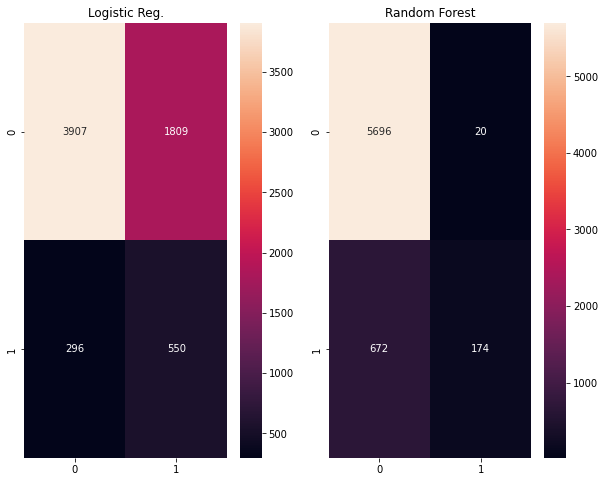

In [ ]:
fix, ax = plt.subplots(1,2, figsize=[10,8])
sns.heatmap(cm_log, annot=True, fmt='g', ax=ax[0])
ax[0].set_title('Logistic Reg.')
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax[1])
ax[1].set_title('Random Forest')
#sns.heatmap(cm_svc, annot=True, fmt='g', ax=ax[1,0])
#ax[1,0].set_title('SVC')
#sns.heatmap(cm_ann, annot=True, fmt='g', ax=ax[1,1])
#ax[1,1].set_title('ANN');
#crosstab kora lagbe

In [ ]:
#my_model = pickle.load(open('best_model.pkl', 'rb'))
def predict_lemons(csv_file, model):

  '''
  Input : 1. csv_file : CSV data file that has to be predicted
  2. model: a trained model to be used for prediction

  Process: Reads the csv file, prepares the data(cleaning, imputation, pca and feature engineering)
  and predicts the data outcome.

  Output: Returns the prediction.
  '''
  ## Features used for the model.
  cat_cols=['Auction', 'Make', 'Color',
  'Nationality', 'Size', 'TopThreeAmericanName',
  'AUCGUART', 'VNST']
  num_cols=['VehOdo', 'VehBCost',
  'WarrantyCost', 'pca_Price']

  nom_cols = ['VehicleAge', 'WheelTypeID', 'IsOnlineSale']

  ## median values used for data imputation
  #medians_list = [6092.0, 7298.0, 8438.0, 9792.0, 6063.0, 7316.0, 8736.0, 10103.0, 6700.0]

  # 1. Read csv
  df = pd.read_csv(csv_file,delimiter=";")

  # 2. clean data frame.
  df = clean_data(df)
  # 3. Data imputation
  df = data_imputation(df)

  # 4. Dimensioanlity reduction using PCA
  df = dim_reduction(df)

  #. 5. Feature engineering
  df = engineer_features(df)
  # 6. Data Prediction
  predictions = model.predict(df)

  return(predictions)


In [ ]:
lemons = predict_lemons('features_aim.csv', pipe_log)
sum(lemons)


All Principal components [[ 0.29769256  0.32896334  0.38100671  0.4100233   0.29015558  0.32157996
   0.37436485  0.40264632]
 [-0.00643414 -0.03431756 -0.50194827 -0.54948035  0.39990674  0.42616732
   0.21147999  0.2421413 ]
 [ 0.43596997  0.50110442 -0.09129669 -0.03542255  0.19434506  0.22279858
  -0.48126067 -0.47980585]
 [ 0.30971418  0.50077387 -0.33923564 -0.15721277 -0.4571884  -0.40394848
   0.17415264  0.33313845]
 [-0.43299565  0.18120676 -0.33921448  0.41083231 -0.24175518  0.384722
  -0.42180932  0.33384058]
 [-0.25281387  0.18619514 -0.45493625  0.42957287  0.23743481 -0.17753155
   0.47502855 -0.4431386 ]
 [ 0.36114009 -0.35635323 -0.31187219  0.31697977  0.42869527 -0.39747928
  -0.32753597  0.30951664]
 [ 0.49348029 -0.44071892 -0.24529207  0.22402992 -0.45879474  0.40575351
   0.20574539 -0.18554446]]



Explained variation ration: [9.20250650e+01 3.75227319e+00 3.23765943e+00 5.03181610e-01
 3.60745773e-01 8.17575605e-02 2.69276091e-02 1.23897835e-02]


2725

In [ ]:
lemons = predict_lemons('features_aim.csv', model_grid_rf)
sum(lemons)

All Principal components [[ 0.29769256  0.32896334  0.38100671  0.4100233   0.29015558  0.32157996
   0.37436485  0.40264632]
 [-0.00643414 -0.03431756 -0.50194827 -0.54948035  0.39990674  0.42616732
   0.21147999  0.2421413 ]
 [ 0.43596997  0.50110442 -0.09129669 -0.03542255  0.19434506  0.22279858
  -0.48126067 -0.47980585]
 [ 0.30971418  0.50077387 -0.33923564 -0.15721277 -0.4571884  -0.40394848
   0.17415264  0.33313845]
 [-0.43299565  0.18120676 -0.33921448  0.41083231 -0.24175518  0.384722
  -0.42180932  0.33384058]
 [-0.25281387  0.18619514 -0.45493625  0.42957287  0.23743481 -0.17753155
   0.47502855 -0.4431386 ]
 [ 0.36114009 -0.35635323 -0.31187219  0.31697977  0.42869527 -0.39747928
  -0.32753597  0.30951664]
 [ 0.49348029 -0.44071892 -0.24529207  0.22402992 -0.45879474  0.40575351
   0.20574539 -0.18554446]]



Explained variation ration: [9.20250650e+01 3.75227319e+00 3.23765943e+00 5.03181610e-01
 3.60745773e-01 8.17575605e-02 2.69276091e-02 1.23897835e-02]


223

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


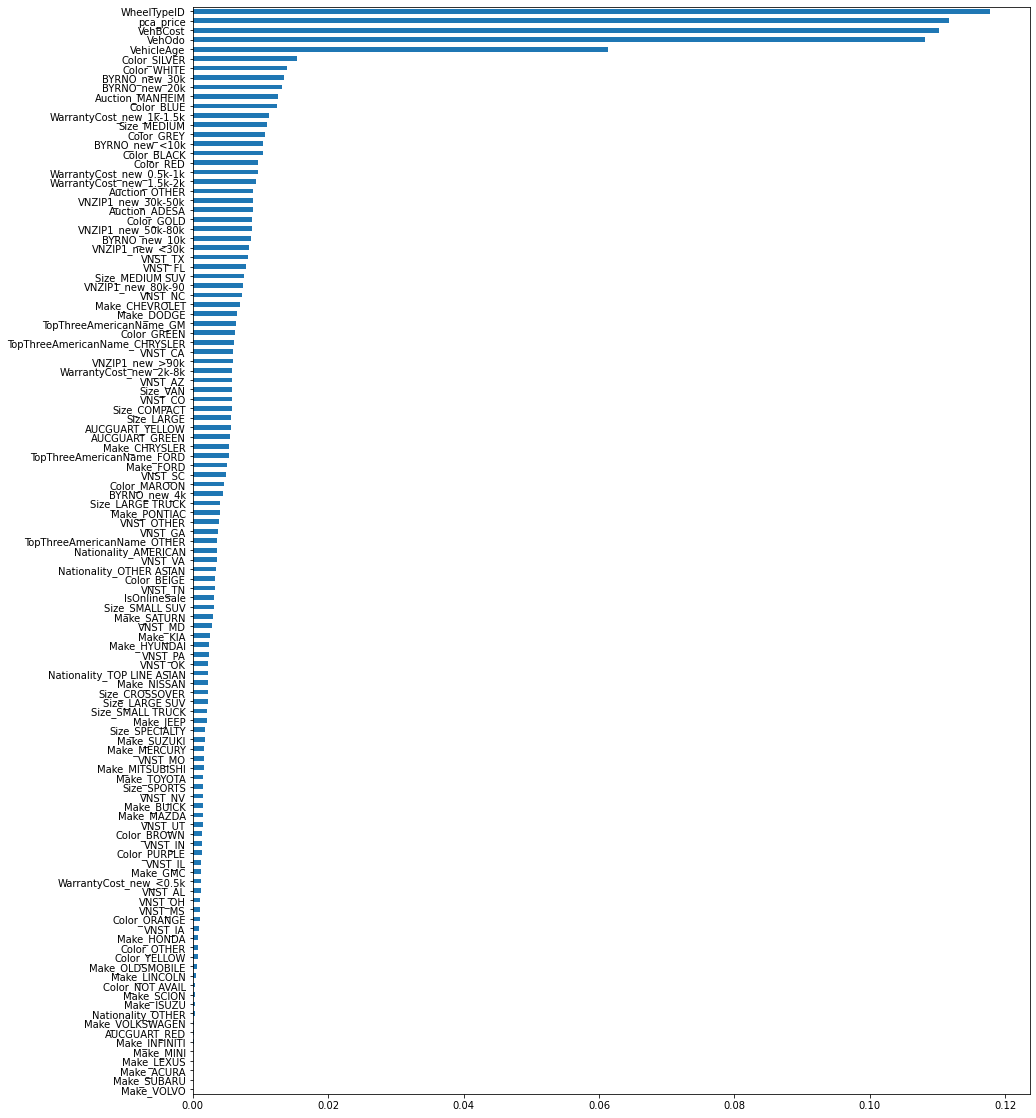

In [ ]:
new_cat_cols = col_tx.named_transformers_["cat"].get_feature_names(cat_cols)
col_list = np.concatenate([new_cat_cols, num_cols])
col_list = np.concatenate([col_list, nom_cols])
fig, ax = plt.subplots(figsize=[15,20])
feature_importance=pd.Series(model_grid_rf.best_estimator_[1].feature_importances_, index=col_list)
feature_importance.sort_values().plot(kind='barh', ax=ax);

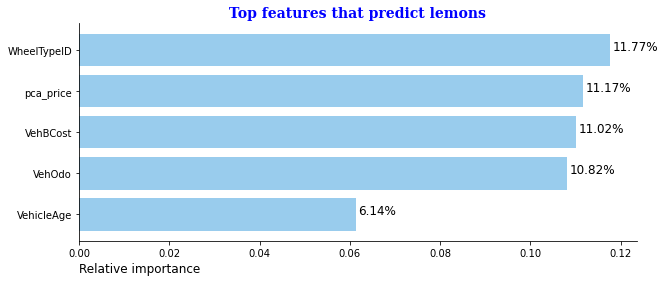

In [ ]:
colors = ['#99cced']*5 + ['#17415f']
fig, ax = plt.subplots(figsize=(10, 4))
mask = feature_importance > 0.05
top_feature_importance = feature_importance.loc[mask]
top_feature_importance = top_feature_importance.sort_values()
top_feature_importance.plot(kind='barh', color=colors, width=0.8)
for idx in range(len(top_feature_importance.index)):
 ax.text(s='{:.2f}%'.format((100*top_feature_importance.iloc[idx])),
 x=top_feature_importance.iloc[idx]+0.0005,
 y=idx, size=12,
 color='black'
 )
ax.set_title(label='Top features that predict lemons',
 family='serif',
 color='blue',
 weight='semibold',
 size=14
 )
ax.set_xlabel('Relative importance',
 size=12, position=[0, 0],
 horizontalalignment='left'
 )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=8684ac334bdd7aed9165a50db2a891c93e7eae73980bcaffd31b8e00f44d7512
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152122 sha256=a95e9a211e8259eaeb921b367a4dbdf89785ee50208aa01d47c256e0718e0e88
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=

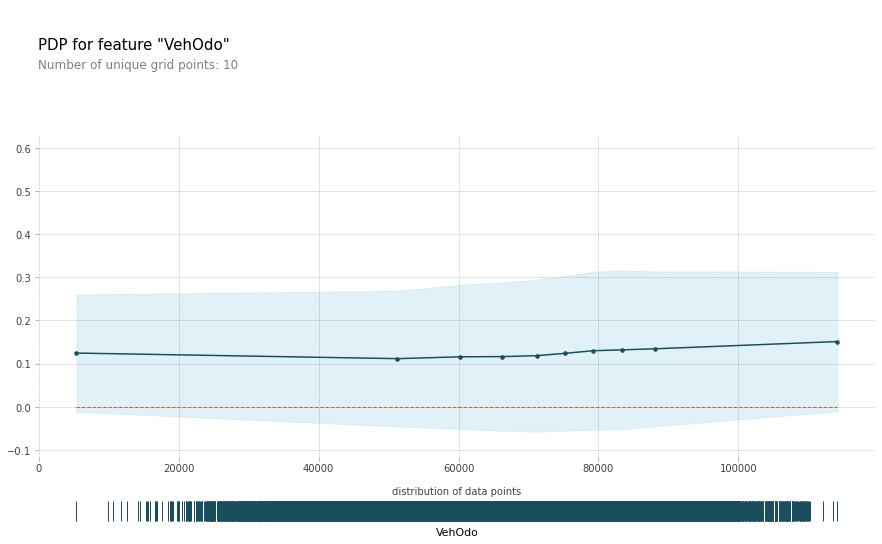

In [ ]:
!pip install pdpbox
from pdpbox import pdp
pdp_VehOdo=pdp.pdp_isolate(model=model_grid_rf,
 dataset=features_train,
 model_features=features_train.columns,
 feature='VehOdo')
pdp_VehOdo=pdp.pdp_plot(pdp_isolate_out=pdp_VehOdo,
 feature_name='VehOdo',
 plot_pts_dist=True,
 center=False);

